# Import packages

In [1]:
from pathlib import Path
import os, sys
for p in [Path.cwd()] + list(Path.cwd().parents):
    if p.name == 'Multifirefly-Project':
        os.chdir(p)
        sys.path.insert(0, str(p / 'multiff_analysis/multiff_code/methods'))
        break

%load_ext autoreload
%autoreload 2


from data_wrangling import specific_utils, combine_info_utils
from pattern_discovery import pattern_by_trials, pattern_by_trials, cluster_analysis, organize_patterns_and_features, category_class
from decision_making_analysis.cluster_replacement import cluster_replacement_utils
from decision_making_analysis.decision_making import decision_making_class, decision_making_utils, intended_targets_classes
from decision_making_analysis.GUAT import GUAT_collect_info_class, GUAT_combine_info_class
from decision_making_analysis.compare_GUAT_and_TAFT import GUAT_vs_TAFT_class, GUAT_vs_TAFT_x_sessions_class, helper_GUAT_vs_TAFT_class
from decision_making_analysis.compare_GUAT_and_TAFT import GUAT_vs_TAFT_utils
from visualization.matplotlib_tools import plot_trials, plot_behaviors_utils
from visualization.animation import animation_class
from null_behaviors import show_null_trajectory, find_best_arc, curvature_utils, curv_of_traj_utils
from machine_learning.ml_methods import regression_utils, classification_utils, prep_ml_data_utils, hyperparam_tuning_class
from visualization.plotly_polar_tools import plotly_utils_polar, plotly_for_ff_polar, plotly_for_trajectory_polar
from machine_learning.ml_methods import ml_methods_class
from decision_making_analysis.compare_GUAT_and_TAFT import find_GUAT_or_TAFT_trials

import os, sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from os.path import exists
import math
import copy
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import gc
from scipy import stats
from IPython.display import HTML
from matplotlib import rc
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings
import os, sys, sys
from importlib import reload
from sklearn.exceptions import ConvergenceWarning
import seaborn as sns


plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
pd.options.display.max_rows = 50



Set up logging configuration.


/opt/miniconda3/envs/multiff_clean/lib/python3.11/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


# Data for one session

In [17]:
exists_ok = True
cgt = GUAT_vs_TAFT_class.GUATvsTAFTclass(ref_point_mode='time', 
                                        # raw_data_folder_path='all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330',
                                        # raw_data_folder_path='all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330',
                                        #raw_data_folder_path='all_monkey_data/raw_monkey_data/monkey_Bruno/data_0326',
                                         raw_data_folder_path='all_monkey_data/raw_monkey_data/monkey_Bruno/data_0322',
                                            ref_point_value=-1.5,)
cgt.streamline_getting_GUAT_or_TAFT_x_df(GUAT_or_TAFT='TAFT', exists_ok=exists_ok)
cgt.streamline_getting_GUAT_or_TAFT_x_df(GUAT_or_TAFT='GUAT', exists_ok=exists_ok)


In [19]:
exists_ok = True
cgt = GUAT_vs_TAFT_class.GUATvsTAFTclass(ref_point_mode='time', 
                                        # raw_data_folder_path='all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330',
                                        # raw_data_folder_path='all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330',
                                        #raw_data_folder_path='all_monkey_data/raw_monkey_data/monkey_Bruno/data_0326',
                                         raw_data_folder_path='all_monkey_data/raw_monkey_data/monkey_Bruno/data_0322',
                                            ref_point_value=-1.5,)
cgt.streamline_getting_GUAT_or_TAFT_x_df(GUAT_or_TAFT='TAFT', exists_ok=exists_ok)
cgt.streamline_getting_GUAT_or_TAFT_x_df(GUAT_or_TAFT='GUAT', exists_ok=exists_ok)

cgt.get_relevant_monkey_data(already_retrieved_ok=True)
cgt.find_patterns()
cgt.make_PlotTrials_args()
cgt.make_or_retrieve_target_clust_last_vis_df()


cgt.make_curvature_df()
cgt.find_opt_arc_info_from_curvature_df()
cgt.make_best_arc_df()
cgt.get_elements_for_plotting()

# get null arc info for plotting
cgt.null_arc_info_for_plotting = show_null_trajectory.find_and_package_opt_arc_info_for_plotting(cgt.best_arc_df, cgt.monkey_information, column_for_color=None, ignore_error=True)
all_point_index = cgt.best_arc_df.point_index.values
all_ff_index = cgt.best_arc_df.ff_index.values
remaining_index_of_array, remaining_all_ff_index, remaining_all_point_index = show_null_trajectory.eliminate_invalid_ff_for_null_arc(all_ff_index, all_point_index, cgt.ff_real_position_sorted, cgt.monkey_information)
cgt.find_and_package_arc_to_center_info_for_plotting(remaining_all_point_index, remaining_all_ff_index)

pretty_null_arc_plot_kwargs = {'player': 'monkey',
        'show_believed_target_positions': True,                       
        'show_stops': True,
        'show_reward_boundary': True,
        'show_scale_bar': True,
        'hitting_arena_edge_ok': True,
        'trial_too_short_ok': True,
        'show_alive_fireflies': False,
        'adjust_xy_limits': True,
        'zoom_in': True,
        'minimal_margin': 60,
        }


Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0322/ff_dataframe.h5
Retrieved stop_category_df
Retrieved target_clust_df_short
27 out of 1205 target clusters were not last seen within 10 seconds.They are filtered out when finding the trials that are "visible before last one".
19 out of 1178 target were captured within 0.1 seconds from the previous capture. They are filtered out when finding the trials that are "visible before last one" because the monkey might have just captured two ff together.
58 out of 1159 target clusters were seen at least 0.1 seconds before the previous capture, which is 5.00%
Retrieved target_clust_last_vis_df
Number of unique ff in the dropped rows: 1367
0.0 % of ff has negative y relative to monkey
0.0 % of ff has ff angle that is too large
Both of these case

## cgt.stop_category_df

In [7]:
from decision_making_analysis import assign_attempts
from decision_making_analysis.GUAT import GUAT_utils

In [8]:
cgt.find_patterns()

Retrieved target_clust_df_short
27 out of 1205 target clusters were not last seen within 10 seconds.They are filtered out when finding the trials that are "visible before last one".
19 out of 1178 target were captured within 0.1 seconds from the previous capture. They are filtered out when finding the trials that are "visible before last one" because the monkey might have just captured two ff together.
58 out of 1159 target clusters were seen at least 0.1 seconds before the previous capture, which is 5.00%


In [9]:
cgt.make_one_stop_w_ff_df()
cgt.make_or_retrieve_closest_stop_to_capture_df()

In [22]:
cgt.make_or_retrieve_stop_category_df()

# exp

In [11]:
from data_wrangling import further_processing_class, retrieve_raw_data, time_calib_utils


In [20]:
reload(further_processing_class)

<module 'data_wrangling.further_processing_class' from '/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/data_wrangling/further_processing_class.py'>

In [15]:
reload(GUAT_vs_TAFT_class)

<module 'decision_making_analysis.compare_GUAT_and_TAFT.GUAT_vs_TAFT_class' from '/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/decision_making_analysis/compare_GUAT_and_TAFT/GUAT_vs_TAFT_class.py'>

In [23]:
cgt.stop_category_df

time  point_index  stop_id  stop_id_start_time  stop_id_end_time  \
0      12.09627          723        1            12.07970          12.29605   
1      13.70696          822        2            13.69035          13.87295   
2      14.27143          856        3            14.25487          14.50381   
3      15.61596          939        4            15.59937          15.84831   
4      17.15967         1034        5            17.14304          17.27592   
...         ...          ...      ...                 ...               ...   
2440 3596.08661       218777     2441          3596.07005        3596.08661   
2441 3596.33559       218794     2442          3596.31902        3596.56795   
2442 3596.91664       218829     2443          3596.90013        3597.53075   
2443 3598.55995       218930     2444          3598.54336        3598.77572   
2444 3599.17412       218967     2445          3599.15750        3599.19074   

      temp_stop_cluster_id  monkey_x   monkey_y  trial  target_index  \
0                        0  72.08832 -180.65280      0             0   
1                        1 107.93525 -374.17767      2             2   
2                        1 111.84319 -409.24066      2             2   
3                        2  53.37774 -544.97211      4             4   
4                        3 -55.77072 -735.69922      5             5   
...                    ...       ...        ...    ...           ...   
2440                  1740 503.17801 -273.89926   1270          1270   
2441                  1741 506.34329 -272.82236   1271          1271   
2442                  1741 487.34662 -278.32517   1271          1271   
2443                  1742 372.20196 -319.32916   1272          1272   
2444                  1742 345.95563 -333.86981   1272          1272   

      num_capture  associated_target attempt_type  associated_ff  \
0               2            0.00000      capture        0.00000   
1               0            2.00000         TAFT        2.00000   
2               2            2.00000         TAFT        2.00000   
3               1            4.00000      capture        4.00000   
4               0            5.00000         TAFT        5.00000   
...           ...                ...          ...            ...   
2440            1         1270.00000      capture     1270.00000   
2441            0         1271.00000         TAFT     1271.00000   
2442            1         1271.00000         TAFT     1271.00000   
2443            0         1272.00000         TAFT     1272.00000   
2444            1         1272.00000         TAFT     1272.00000   

      stop_cluster_id  stop_cluster_size  stop_cluster_start_point  \
0                   0                  1                       723   
1                   1                  2                       822   
2                   1                  2                       822   
3                   2                  1                       939   
4                   3                  2                      1034   
...               ...                ...                       ...   
2440             1808                  1                    218777   
2441             1809                  2                    218794   
2442             1809                  2                    218794   
2443             1810                  2                    218930   
2444             1810                  2                    218930   

      stop_cluster_end_point  stop_id_duration  
0                        723          -0.21636  
1                        856          -0.18260  
2                        856          -0.24895  
3                        939          -0.24894  
4                       1065          -0.13288  
...                      ...               ...  
2440                  218777          -0.01656  
2441                  218829          -0.24893  
2442                  218829          -0.63062  
2443                  218967          -0.23236  


# Plot

In [ ]:
## shared kwargs
shared_kwargs = {'show_path_when_target_visible': False,
                            'show_connect_path_ff': False,
                            'show_alive_fireflies': False,
                            'show_visible_fireflies': False,
                            'show_alive_fireflies': False,
                            'show_connect_path_ff_memory': False,
                            'show_believed_target_positions': True,
                            'show_scale_bar': False,
                            'show_start': False,
                            'show_reward_boundary': False,
                            'zoom_in': True,
                            'minimal_margin': 10,
                            'show_legend': False,
                            'dpi': 300
                            }

## plot GUAT

In [ ]:
# df_sub = cgt.stop_category_df[cgt.stop_category_df['attempt_type']=='GUAT']
df_sub = cgt.stop_category_df[cgt.stop_category_df['attempt_type']=='TAFT']
df_sub = df_sub.drop_duplicates(subset=['stop_cluster_id'])

currentTrial: 78 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  78
duration: [201.688412, 206.688412]


currentTrial: 85 num_trials: 3
Since target_index is not provided, it is set to currentTrial:  85
duration: [215.930989, 220.930989]


currentTrial: 93 num_trials: 2
duration[0] updated to 240.143554 to truncate the part of crossing arena edge
Since target_index is not provided, it is set to currentTrial:  93
duration: [np.float64(240.143554), 242.726421]


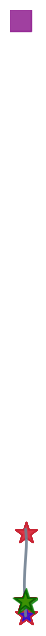

currentTrial: 94 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  94
duration: [244.067536, 249.067536]


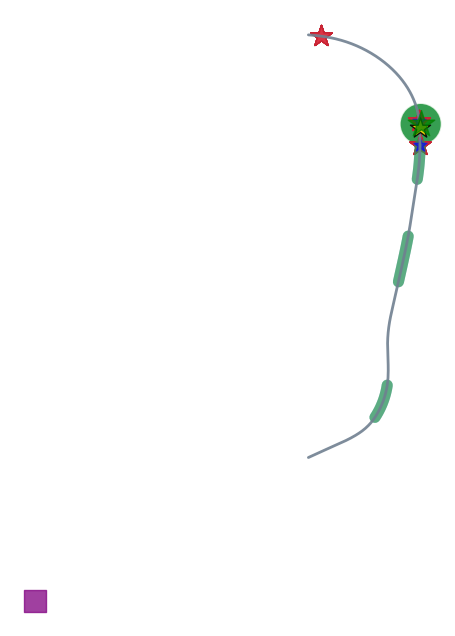

currentTrial: 101 num_trials: 2
The monkey crossed the arena edge at 270.487829 but the duration is long enough (more than 2/3 of the original duration) to include the crossing
Since target_index is not provided, it is set to currentTrial:  101
duration: [266.825677, 271.825677]


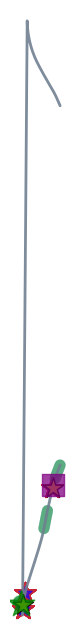

currentTrial: 102 num_trials: 1
duration[0] updated to 270.487829 to truncate the part of crossing arena edge
Since target_index is not provided, it is set to currentTrial:  102
duration: [np.float64(270.487829), 275.112405]


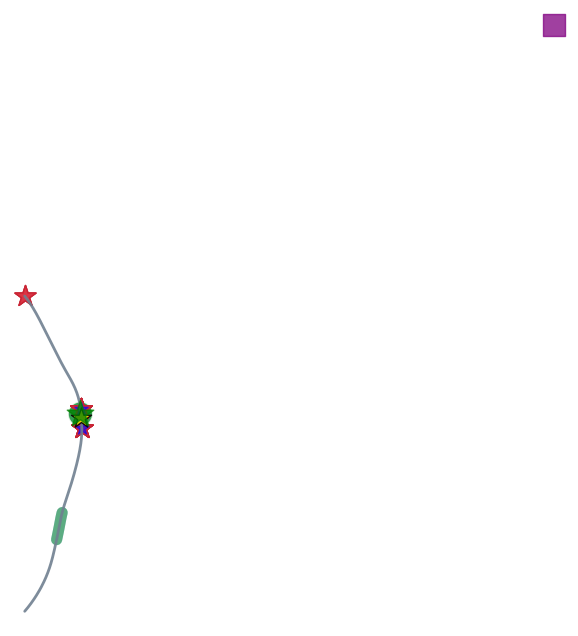

currentTrial: 106 num_trials: 2
The monkey crossed the arena edge at 286.00837 but the duration is long enough (more than 2/3 of the original duration) to include the crossing
Since target_index is not provided, it is set to currentTrial:  106
duration: [281.881605, 286.881605]


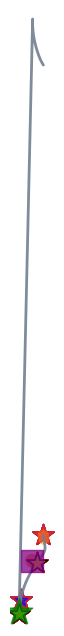

currentTrial: 112 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  112
duration: [294.928924, 299.928924]


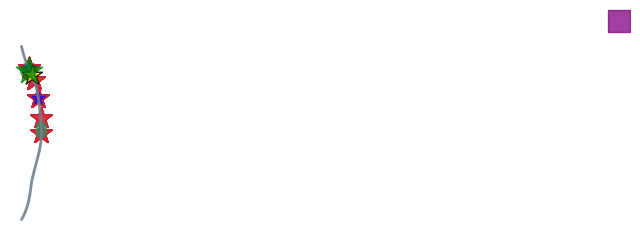

currentTrial: 114 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  114
duration: [299.161826, 304.161826]


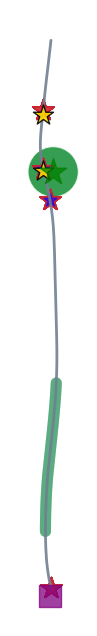

currentTrial: 119 num_trials: 3
Since target_index is not provided, it is set to currentTrial:  119
duration: [316.14335, 321.14335]


currentTrial: 119 num_trials: 2
The monkey crossed the arena edge at 321.714462 but the duration is long enough (more than 2/3 of the original duration) to include the crossing
Since target_index is not provided, it is set to currentTrial:  119
duration: [317.670752, 322.670752]


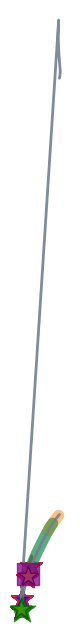

currentTrial: 120 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  120
duration: [323.795808, 328.795808]


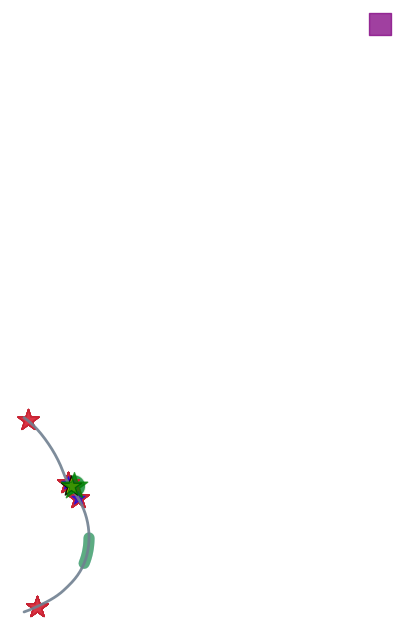

currentTrial: 123 num_trials: 4
Since target_index is not provided, it is set to currentTrial:  123
duration: [325.970405, 330.970405]


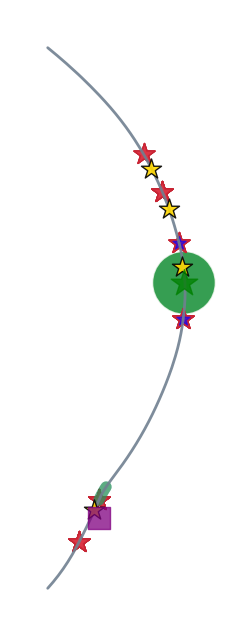

currentTrial: 130 num_trials: 3
Since target_index is not provided, it is set to currentTrial:  130
duration: [342.918641, 347.918641]


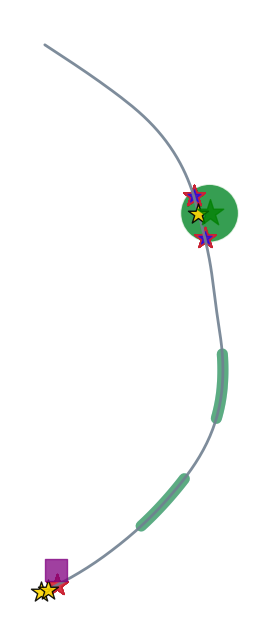

currentTrial: 132 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  132
duration: [347.334181, 352.334181]


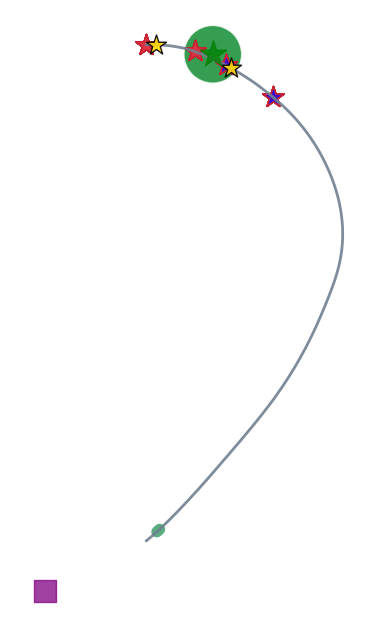

currentTrial: 132 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  132
duration: [348.711914, 353.711914]


currentTrial: 136 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  136
duration: [359.103333, 364.103333]


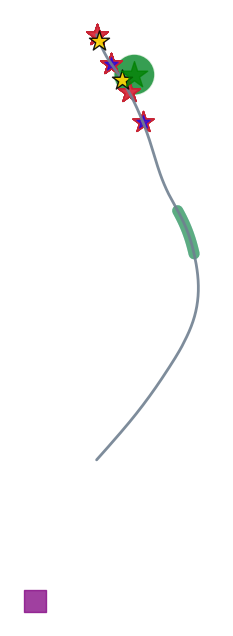

currentTrial: 144 num_trials: 3
Since target_index is not provided, it is set to currentTrial:  144
duration: [376.549671, 381.549671]


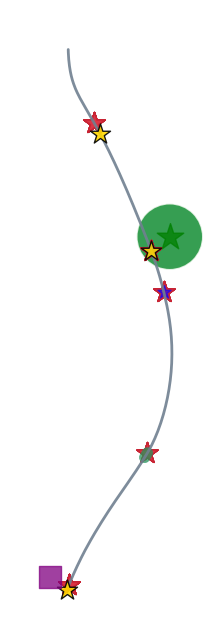

currentTrial: 149 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  149
duration: [386.741825, 391.741825]


currentTrial: 150 num_trials: 2
The monkey crossed the arena edge at 392.611691 but the duration is long enough (more than 2/3 of the original duration) to include the crossing
Since target_index is not provided, it is set to currentTrial:  150
duration: [388.766973, 393.766973]


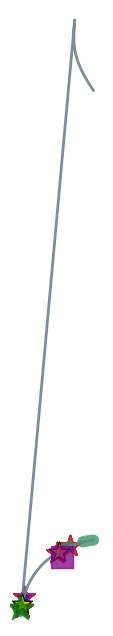

In [ ]:
counter = 0

#for index, row in cgt.one_stop_w_ff_df.iloc[20:].iterrows():
for index, row in df_sub.iloc[20:].iterrows():
    
    stop_time = row['time']
    point_indices_to_be_marked = [row['stop_cluster_start_point'], row['stop_cluster_end_point']]
    indices_of_ff_to_mark = [int(row['associated_ff'])]
    show_visible_segments_ff_indices = [row['associated_ff'], row['target_index']-1, row['target_index']]
    
    duration = [stop_time - 2.5, stop_time + 2.5]

    plotting_kwargs_temp = copy.deepcopy(cgt.plotting_kwargs)
    plotting_kwargs_temp.update(shared_kwargs)
    plotting_kwargs_temp.update({'show_visible_segments_on_trajectory_ff_indices': show_visible_segments_ff_indices,
                                 'dpi': 100,
                                 'point_indices_to_be_marked_2nd_kind': point_indices_to_be_marked,
                                 'indices_of_ff_to_mark': [int(row['associated_ff'])],
                                 'indices_of_ff_to_mark_2nd_kind': [row['target_index']-1],
                                 'truncate_part_before_crossing_arena_edge': True
                                })

    returned_info = plot_trials.PlotTrials(duration, 
                *cgt.PlotTrials_args,
                **plotting_kwargs_temp,         
                )
    
    
    plt.title('')


    plt.show()
    
    
    

    counter += 1
    if counter == 20:
        break


## plot one stop

In [ ]:
one_stop_sub = cgt.stop_category_df[cgt.stop_category_df['attempt_type']=='miss'].copy()

In [ ]:
one_stop_sub

time  point_index  stop_id  stop_id_start_time  stop_id_end_time  \
6      20.87794         1259        7            20.86134          21.09372   
8      22.67086         1369        9            22.65435          22.88664   
28     49.34650         2994       29            49.32991          49.44612   
46     75.52432         4593       47            75.50752          75.65703   
182   248.49294        15130      183           248.47626         248.75848   
...         ...          ...      ...                 ...               ...   
2200 3208.38414       195198     2201          3208.36751        3208.79914   
2229 3250.61379       197761     2230          3250.59722        3250.86276   
2376 3489.68258       212310     2377          3489.66603        3489.86515   
2377 3490.79474       212377     2378          3490.77815        3491.06030   
2411 3549.57423       215945     2412          3549.55765        3549.92284   

      stop_cluster_id  stop_cluster_start_point  stop_cluster_end_point  \
6                   4                1259.00000              1259.00000   
8                   5                1329.00000              1369.00000   
28                 20                2994.00000              2994.00000   
46                 35                4550.00000              4593.00000   
182               122               15130.00000             15130.00000   
...               ...                       ...                     ...   
2200             1462              195198.00000            195198.00000   
2229             1479              197761.00000            197761.00000   
2376             1570              212310.00000            212310.00000   
2377             1571              212377.00000            212377.00000   
2411             1593              215945.00000            215945.00000   

      stop_cluster_size   monkey_x   monkey_y  trial  target_index  \
6                     1   -0.36526  790.23877      6             6   
8                     2  -82.13994  661.60034      8             8   
28                    1 -812.79175 -128.57140     18            18   
46                    2 -278.55487 -552.79291     30            30   
182                   1 -215.20616  254.78258     95            95   
...                 ...        ...        ...    ...           ...   
2200                  1 -138.96027 -325.35266   1137          1137   
2229                  1 -579.73944  800.61334   1148          1148   
2376                  1 -774.69409 -194.35727   1235          1235   
2377                  1 -832.40021 -107.45470   1235          1235   
2411                  1  380.35342  656.42743   1254          1254   

      num_capture  associated_target  distance_to_target_+0 attempt_type  \
6               0                NaN              128.27233         miss   
8               0                NaN              255.11857         miss   
28              0                NaN              334.60784         miss   
46              0                NaN              197.84240         miss   
182             0                NaN              377.51002         miss   
...           ...                ...                    ...          ...   
2200            0                NaN              415.29767         miss   
2229            0                NaN             1932.46477         miss   
2376            0                NaN              179.96050         miss   
2377            0                NaN              102.57220         miss   
2411            0                NaN              131.19898         miss   

      associated_ff  new_stop_cluster_id  new_stop_cluster_size  
6          71.00000                    5                      1  
8          40.00000                    7                      1  
28        157.00000                   24                      1  
46        188.00000                   40                      1  
182       134.00000                  143                      1  
...        

currentTrial: 852 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  852
duration: [2278.1931, 2283.1931]


currentTrial: 852 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  852
duration: [2284.086678, 2289.086678]


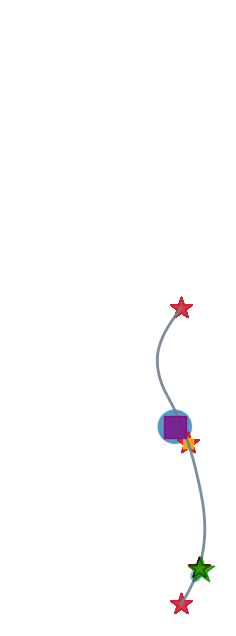

currentTrial: 855 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  855
duration: [2292.867916, 2297.867916]


currentTrial: 883 num_trials: 1
duration[0] updated to 2382.599407 to truncate the part of crossing arena edge
Since target_index is not provided, it is set to currentTrial:  883
duration: [np.float64(2382.599407), 2384.285891]


currentTrial: 897 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  897
duration: [2423.540656, 2428.540656]


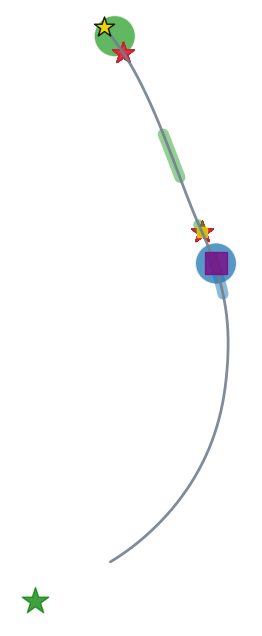

currentTrial: 897 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  897
duration: [2427.640848, 2432.640848]


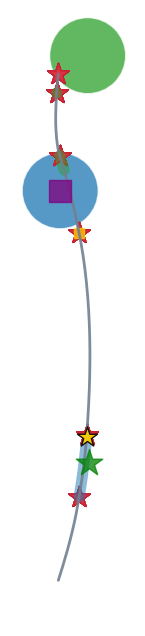

currentTrial: 899 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  899
duration: [2435.127254, 2440.127254]


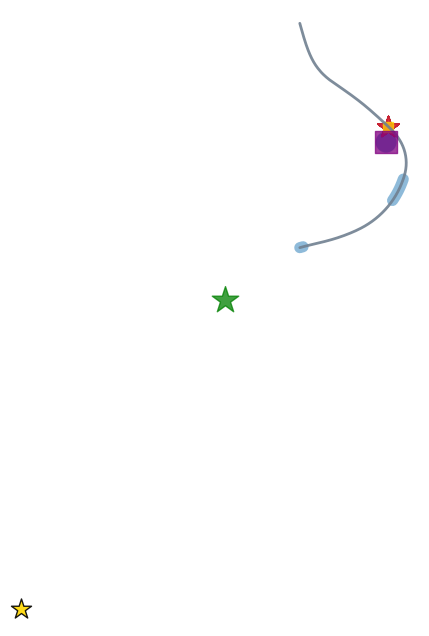

currentTrial: 921 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  921
duration: [2506.323387, 2511.323387]


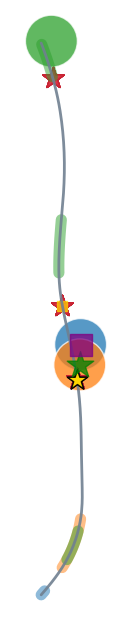

currentTrial: 935 num_trials: 1
The monkey crossed the arena edge at 2556.829342 but the duration is long enough (more than 2/3 of the original duration) to include the crossing
Since target_index is not provided, it is set to currentTrial:  935
duration: [2553.433181, 2558.433181]


currentTrial: 942 num_trials: 1
The monkey crossed the arena edge at 2583.67154 but the duration is long enough (more than 2/3 of the original duration) to include the crossing
Since target_index is not provided, it is set to currentTrial:  942
duration: [2578.680888, 2583.680888]


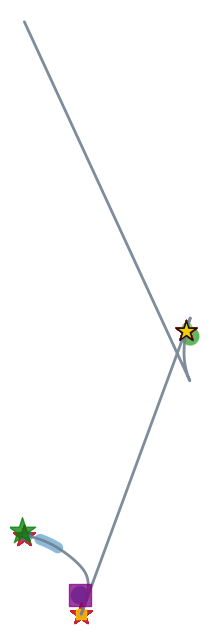

currentTrial: 943 num_trials: 1
duration[0] updated to 2585.016064 to truncate the part of crossing arena edge
Since target_index is not provided, it is set to currentTrial:  943
duration: [np.float64(2585.016064), 2588.644675]


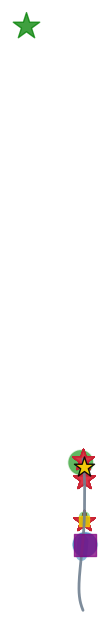

currentTrial: 964 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  964
duration: [2655.023393, 2660.023393]


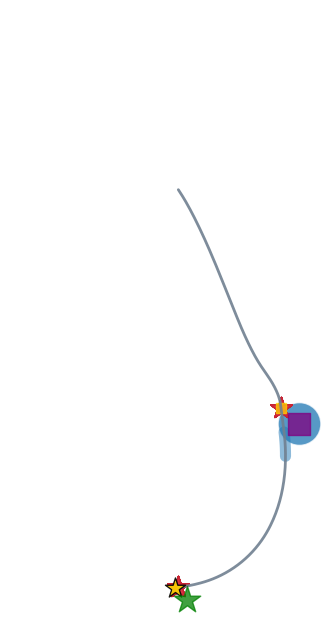

currentTrial: 967 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  967
duration: [2669.465131, 2674.465131]


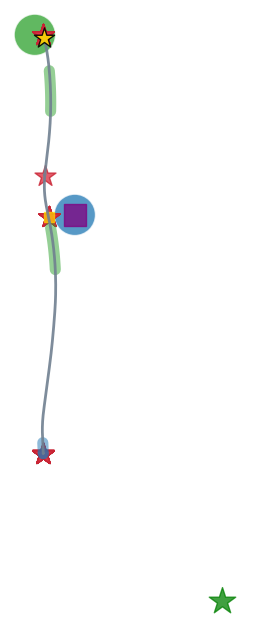

currentTrial: 997 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  997
duration: [2759.068955, 2764.068955]


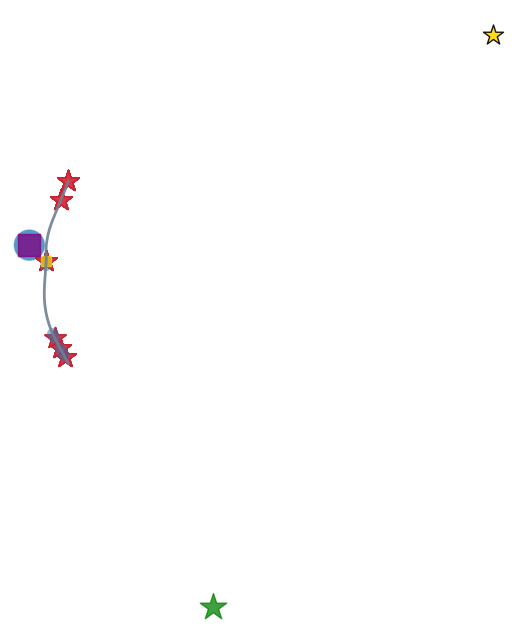

currentTrial: 997 num_trials: 1
The monkey crossed the arena edge at 2770.484729 but the duration is long enough (more than 2/3 of the original duration) to include the crossing
Since target_index is not provided, it is set to currentTrial:  997
duration: [2765.527547, 2770.527547]


currentTrial: 1032 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  1032
duration: [2861.324376, 2866.324376]


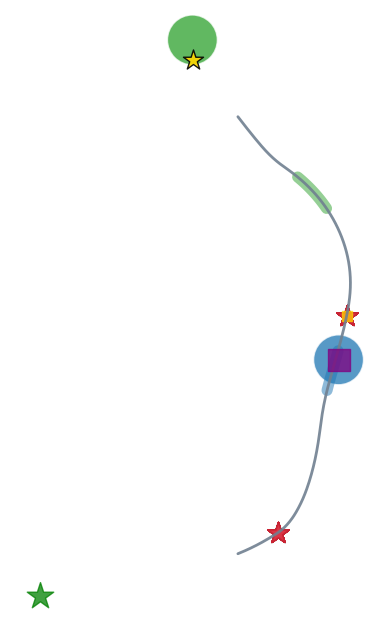

currentTrial: 1043 num_trials: 1
duration[0] updated to 2912.445059 to truncate the part of crossing arena edge
Since target_index is not provided, it is set to currentTrial:  1043
duration: [np.float64(2912.445059), 2915.608812]


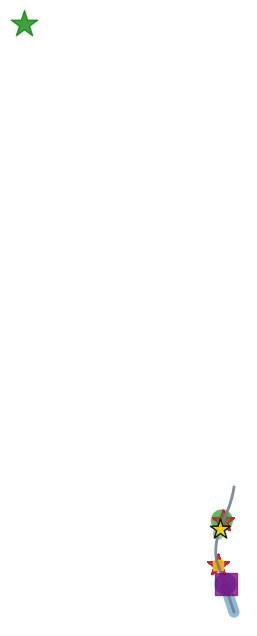

currentTrial: 1052 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  1052
duration: [2931.358445, 2936.358445]


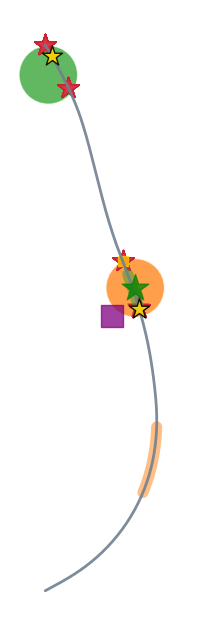

currentTrial: 1053 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  1053
duration: [2940.32231, 2945.32231]


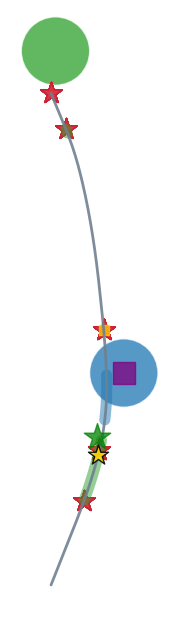

currentTrial: 1079 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  1079
duration: [3032.118251, 3037.118251]


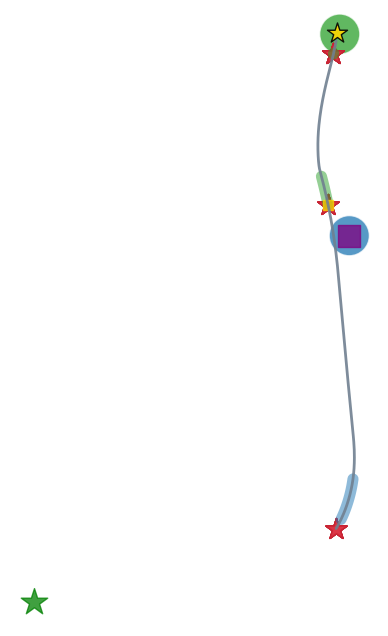

In [ ]:
counter = 0

#for index, row in cgt.one_stop_w_ff_df.iloc[20:].iterrows():
for index, row in one_stop_sub.iloc[50:].iterrows():
    
    stop_time = row['time']
    point_indices_to_be_marked = [row['point_index']]
    indices_of_ff_to_mark = [int(row['associated_ff'])]
    show_visible_segments_ff_indices = [row['associated_ff'], row['target_index']-1, row['target_index']]
    
    duration = [stop_time - 2.5, stop_time + 2.5]

    plotting_kwargs_temp = copy.deepcopy(cgt.plotting_kwargs)
    plotting_kwargs_temp.update(shared_kwargs)
    plotting_kwargs_temp.update({'show_visible_segments_on_trajectory_ff_indices': show_visible_segments_ff_indices,
                                 'dpi': 100,
                                 'point_indices_to_be_marked': point_indices_to_be_marked,
                                 'indices_of_ff_to_mark': [row['target_index']-1],
                                 'indices_of_ff_to_mark_2nd_kind': indices_of_ff_to_mark
                                })

    returned_info = plot_trials.PlotTrials(duration, 
                *cgt.PlotTrials_args,
                **plotting_kwargs_temp,         
                )
    
    
    plt.title('')


    plt.show()
    
    
    

    counter += 1
    if counter == 20:
        break


## plot trials

### from trials

currentTrial: 54 num_trials: 3
Since target_index is not provided, it is set to currentTrial:  54
duration: [np.float64(139.831451), np.float64(147.338522)]


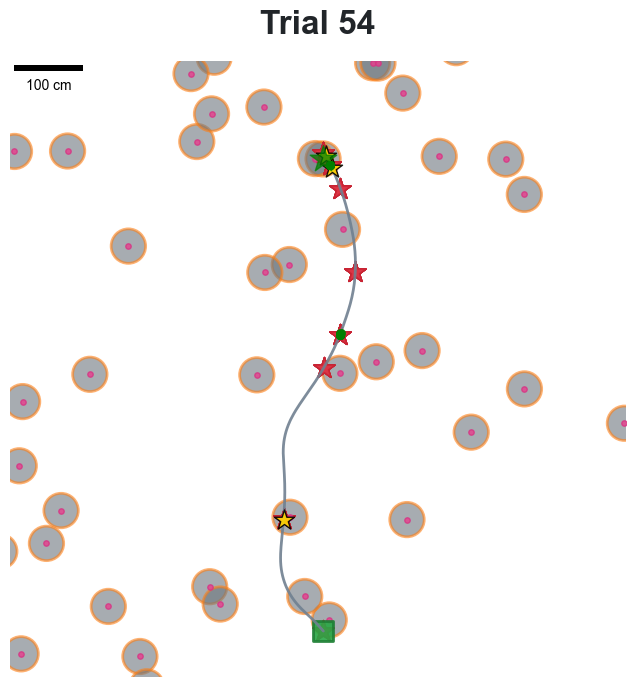

In [ ]:
trial = 53

plotting_kwargs_temp = copy.deepcopy(cgt.plotting_kwargs)
plotting_kwargs_temp.update({'show_path_when_target_visible': True,
                            'show_connect_path_ff': False,
                            'show_connect_path_ff_memory': False,
                            #'show_ff_indices': True,
                            'show_believed_target_positions': True,
                            #'show_connect_path_ff_specific_indices': [row['trial']],
                            #'show_connect_path_ff_except_targets': True,
                            'indices_of_ff_to_mark': [trial],
                            })

#plotting_kwargs_temp['indices_of_ff_to_mark'] = [row[ff_column]]

duration = [cgt.ff_caught_T_new[trial-2], cgt.ff_caught_T_new[trial]+1]
returned_info = plot_trials.PlotTrials(duration, 
            *cgt.PlotTrials_args,
            **plotting_kwargs_temp,         
            )
plt.show()


### from subset

In [ ]:
GUAT_or_TAFT = 'GUAT'
list_of_stop_point_index = cgt.GUAT_x_df[cgt.GUAT_x_df['cur_ff_distance_at_ref'] > 150].stop_point_index.values

In [ ]:
GUAT_or_TAFT = 'TAFT'
list_of_stop_point_index = cgt.TAFT_x_df[cgt.TAFT_x_df['cur_ff_distance_at_ref'] > 150].stop_point_index.values

In [ ]:
cgt.visible_before_last_one_trials

array([  22,   34,   35,   52,   71,   81,   94,   98,  106,  133,  137,
        147,  162,  164,  169,  209,  216,  221,  249,  267,  288,  291,
        318,  330,  340,  349,  352,  353,  373,  399,  412,  439,  450,
        474,  511,  516,  522,  531,  553,  562,  570,  624,  638,  657,
        711,  728,  767,  769,  780,  802,  820,  821,  838,  849,  912,
        923,  936,  950, 1019, 1047, 1056, 1157, 1166, 1171, 1186, 1202,
       1204, 1209, 1219, 1232, 1270, 1277, 1294, 1310, 1318])

In [ ]:
sub = cgt.take_out_subsets_to_plot(list_of_stop_point_index, GUAT_or_TAFT)

counter = 0
for i, row in sub.iloc[0:].iterrows():
    if GUAT_or_TAFT == 'GUAT':
        ff_column = 'latest_visible_ff'
    else:
        ff_column = 'ff_index'

    print('cur_ff_distance_at_ref', row['cur_ff_distance_at_ref'])

    
    plotting_kwargs_temp = copy.deepcopy(cgt.plotting_kwargs)
    plotting_kwargs_temp.update({'show_path_when_target_visible': True,
                                 'currentTrial': row['trial'],
                                 'show_visible_segments_ff_indices': [row['trial']+1, row['trial']],
                                'show_connect_path_ff': False,
                                'show_connect_path_ff_memory': False,
                                #'show_ff_indices': True,
                                'show_believed_target_positions': True,
                                #'show_connect_path_ff_specific_indices': [row['trial']],
                                #'show_connect_path_ff_except_targets': True,
                                })

    #plotting_kwargs_temp['indices_of_ff_to_mark'] = [row[ff_column]]
    trial = row['trial']
    duration = [cgt.ff_caught_T_new[trial-2], cgt.ff_caught_T_new[trial]+1]
    returned_info = plot_trials.PlotTrials(duration, 
                *cgt.PlotTrials_args,
                **plotting_kwargs_temp,         
                )
    plt.show()

    if counter == 0:
        break
    counter += 1

cur_ff_distance_at_ref 174.54255768396925
currentTrial: 8 num_trials: 2
duration[0] updated to 54.206478 to truncate the part of crossing arena edge
After truncating due to crossing arena edge, currentTrial is changed from 8 to 9
Since target_index is not provided, it is set to currentTrial:  9
duration: [np.float64(54.206478), np.float64(59.754132)]


In [ ]:
stop!

SyntaxError: invalid syntax (3319058519.py, line 1)

# Try a few times vs. give up after trying

## Compared with the rest

In [ ]:
reload(decision_making_class)
reload(plot_trials)
reload(intended_targets_classes)

try_a_few_times_trials = cgt.try_a_few_times_trials
target_cluster_TAFT = cgt.target_clust_last_vis_df[cgt.target_clust_last_vis_df['target_index'].isin(try_a_few_times_trials)]
sort_1_df = target_cluster_TAFT
sort_1_trials = sort_1_df.target_index.values
sort_1_name = "Try a few times"


target_cluster_no_flash_after_stopn_TAFT = cgt.target_clust_last_vis_df[~cgt.target_clust_last_vis_df['target_index'].isin(try_a_few_times_trials)]
sort_2_df = target_cluster_no_flash_after_stopn_TAFT
sort_2_trials = sort_2_df.target_index.values
sort_2_name = "Non-TAFT"

category_item = category_class.ProcessCategoryData(sort_1_trials=sort_1_trials, sort_2_trials=sort_2_trials,
                                                              sort_1_name=sort_1_name, sort_2_name=sort_2_name, 
                                                              sort_1_df=sort_1_df, sort_2_df=sort_2_df,                                                     
                                                              PlotTrials_args=cgt.PlotTrials_args, ff_flash_sorted=cgt.ff_flash_sorted,
                                                              null_arc_info_for_plotting=cgt.null_arc_info_for_plotting)

In [ ]:
reload(show_null_trajectory)
reload(decision_making_class)
reload(plot_trials)
reload(intended_targets_classes)
reload(category_class)


category_item.clean_out_cross_boundary_trials()
category_item.clean_out_trials_where_target_cluster_was_not_seen_for_a_long_time_before_capture()
category_item.make_polar_plot_of_target_last_seen_positions()
category_item.make_histograms_of_target_last_seen_attributes()
category_item.make_histogram_of_distances_from_previous_targets()
category_item.make_polar_plot_of_positions_from_previous_targets()


category_item.plot_trajectories(trials=category_item.sort_1_trials[17:18], null_arc_info_for_plotting=cgt.null_arc_info_for_plotting)
category_item.plot_distributions_of_visible_ff_and_in_memory_ff()


## visualize predictions

In [ ]:
gnb = GaussianNB()
# gnb.fit(ml_inst.x_var_df, ml_inst.y_var_df)
#(trained_model = gnb, max_plot_to_make = 2)

#category_item.inspect_special_cases(weird_trials=[98, 180, 212, 649])

## plot_trajectories

In [ ]:
current_i = 30

In [ ]:
reload(specific_utils)
reload(plot_trials)
category_item.plot_trajectories(trials=category_item.sort_1_trials[current_i:current_i+2], null_arc_info_for_plotting=cgt.null_arc_info_for_plotting)
current_i = current_i+2

## 724

In [ ]:
cgt.null_arc_to_center_info_for_plotting[cgt.null_arc_to_center_info_for_plotting['arc_point_index']==112997]

In [ ]:
pretty_null_arc_plot_kwargs['show_ff_indices'] = False

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1856.504211, 1862.693883]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([908, 723, 724])
intended_target_ff_index = None #749
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3



show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=230, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )


# Give up after trying

## Compare with TAFT

In [ ]:
cgt.raw_data_folder_path

'all_monkey_data/raw_monkey_data/monkey_Bruno/data_0326'

In [ ]:
# might want to change this to not use cluster, but just ff itself

try_a_few_times_trials = cgt.try_a_few_times_trials
give_up_after_trying_trials = cgt.give_up_after_trying_trials

target_cluster_TAFT = cgt.target_clust_last_vis_df[cgt.target_clust_last_vis_df['target_index'].isin(try_a_few_times_trials)]

sort_1_df = target_cluster_TAFT
sort_1_trials = sort_1_df.target_index.values
sort_1_name = "Retry + Capture" #"Try a few times"

cgt.make_GUAT_cluster_df()
sort_2_df = cgt.GUAT_cluster_df
sort_2_trials = sort_2_df.target_index.values
sort_2_name = "Retry + Fail" #"Give up after trying"
sort_2_ff_indices = cgt.GUAT_cluster_df.last_vis_ff_index.values



category_item = category_class.ProcessCategoryData(sort_1_trials=sort_1_trials, sort_2_trials=sort_2_trials,
                                                              sort_1_name=sort_1_name, sort_2_name=sort_2_name, 
                                                              sort_1_df=sort_1_df, sort_2_df=sort_2_df,
                                                              sort_2_ff_indices = sort_2_ff_indices,
                                                              sort_2_ff_positions = cgt.ff_real_position_sorted[sort_2_ff_indices],                                                             
                                                              PlotTrials_args=cgt.PlotTrials_args, ff_flash_sorted=cgt.ff_flash_sorted,
                                                              null_arc_info_for_plotting=cgt.null_arc_info_for_plotting)

There are 16 trials in Retry + Capture out of 225 that the monkey crossed the boundary before catching the firefly.
There are 4 trials in Retry + Fail out of 97 that the monkey crossed the boundary before catching the firefly.
209 out of 209 left of  Retry + Capture remained after cleaning out trials where target cluster was not seen for a long time before capture.
93 out of 93 left of  Retry + Fail remained after cleaning out trials where target cluster was not seen for a long time before capture.


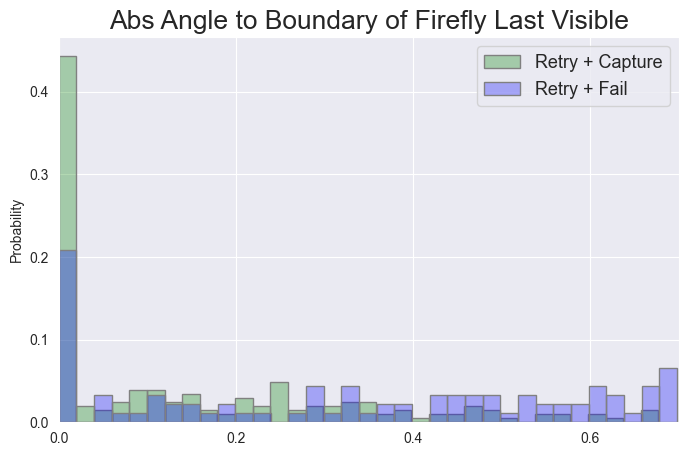

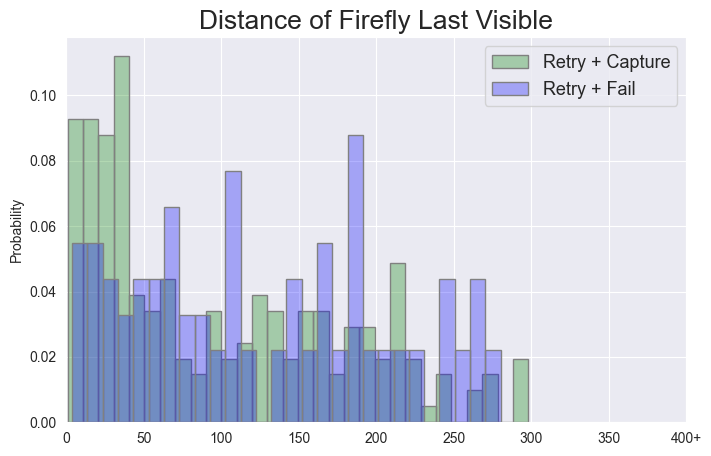

In [ ]:

category_item.clean_out_cross_boundary_trials()
category_item.clean_out_trials_where_target_cluster_was_not_seen_for_a_long_time_before_capture()
category_item.make_polar_plot_of_target_last_seen_positions()
category_item.make_histograms_of_target_last_seen_attributes()
# category_item.make_histogram_of_distances_from_previous_targets()
# category_item.make_polar_plot_of_positions_from_previous_targets()

# category_item.plot_trajectories(trials=category_item.sort_1_trials[17:18], null_arc_info_for_plotting=cgt.null_arc_info_for_plotting)
# category_item.plot_distributions_of_visible_ff_and_in_memory_ff()


## the below function (free selection prediction) shouldn't be used on GUAT. So far, it should only be used on VBLO.
# category_item.make_and_visualize_free_selection_predictions_using_trained_model(trained_model = gnb, max_plot_to_make = 99)
# category_item.inspect_special_cases(weird_trials=[98, 180, 212, 649])

In [ ]:
stop!

SyntaxError: invalid syntax (3319058519.py, line 1)

## Compared with the rest

In [ ]:
give_up_after_trying_trials = cgt.give_up_after_trying_trials

target_cluster_no_flash_after_stopn_GUAT = cgt.target_clust_last_vis_df[~cgt.target_clust_last_vis_df['target_index'].isin(give_up_after_trying_trials)]
target_cluster_GUAT = cgt.target_clust_last_vis_df[cgt.target_clust_last_vis_df['target_index'].isin(give_up_after_trying_trials)]

sort_1_df = target_cluster_no_flash_after_stopn_GUAT
sort_1_trials = sort_1_df.target_index.values
sort_1_name = "Non-GUAT"

sort_2_df = cgt.GUAT_cluster_df
sort_2_trials = sort_2_df.target_index.values
sort_2_name = "Give up after trying"
sort_2_ff_indices = cgt.GUAT_cluster_df.last_vis_ff_index.values
sort_2_time_for_predicting_ff = cgt.GUAT_cluster_df.latest_visible_time_before_last_stop.values

category_item = category_class.ProcessCategoryData(sort_1_trials=sort_1_trials, sort_2_trials=sort_2_trials,
                                                              sort_1_name=sort_1_name, sort_2_name=sort_2_name, 
                                                              sort_1_df=sort_1_df, sort_2_df=sort_2_df,
                                                              sort_2_ff_indices = sort_2_ff_indices,
                                                              sort_2_ff_positions = cgt.ff_real_position_sorted[sort_2_ff_indices],   
                                                              sort_2_time_for_predicting_ff = sort_2_time_for_predicting_ff,                                                       
                                                              PlotTrials_args=cgt.PlotTrials_args, ff_flash_sorted=cgt.ff_flash_sorted,
                                                              null_arc_info_for_plotting=cgt.null_arc_info_for_plotting)

In [ ]:
category_item.clean_out_cross_boundary_trials()
category_item.clean_out_trials_where_target_cluster_was_not_seen_for_a_long_time_before_capture()
category_item.make_polar_plot_of_target_last_seen_positions()
category_item.make_histograms_of_target_last_seen_attributes()
category_item.make_histogram_of_distances_from_previous_targets()
category_item.make_polar_plot_of_positions_from_previous_targets()
category_item.plot_trajectories(trials=category_item.sort_1_trials[17:18], null_arc_info_for_plotting=cgt.null_arc_info_for_plotting)
category_item.plot_distributions_of_visible_ff_and_in_memory_ff()
## The function below (free selection prediction) shouldn't be used on GUAT. So far, it should only be used on VBLO.
#category_item.make_and_visualize_free_selection_predictions_using_trained_model(trained_model = gnb, use_sort_1=False, use_sort_2=True, max_plot_to_make=3)
# category_item.inspect_special_cases(weird_trials=[98, 180, 212, 649])

# For PPT

## shared kwargs

In [ ]:
shared_kwargs = {'show_path_when_target_visible': False,
                            'show_connect_path_ff': False,
                            'show_alive_fireflies': False,
                            'show_visible_fireflies': False,
                            'show_alive_fireflies': False,
                            'show_connect_path_ff_memory': False,
                            'show_believed_target_positions': True,
                            'show_scale_bar': False,
                            'show_start': False,
                            'show_reward_boundary': False,
                            'zoom_in': True,
                            'minimal_margin': 10,
                            'show_legend': False,
                            'dpi': 300
                            }

## GUAT: 0330 - 756

In [ ]:
df_sub = cgt.GUAT_w_ff_df.loc[cgt.GUAT_w_ff_df['trial']==756]

In [ ]:
reload(plot_trials)
reload(plot_behaviors_utils)

<module 'visualization.matplotlib_tools.plot_behaviors_utils' from '/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/visualization/matplotlib_tools/plot_behaviors_utils.py'>

In [ ]:
stop_time = df_sub['last_stop_time'].values[0]

#show_visible_segments_ff_indices = [df_sub['ff_index'].values[0]]
show_visible_segments_ff_indices = np.array([756, 1089, 1703])

duration = [stop_time - 4, stop_time + 2]

plotting_kwargs_temp = copy.deepcopy(cgt.plotting_kwargs)
plotting_kwargs_temp.update(shared_kwargs)
plotting_kwargs_temp.update({'show_visible_segments_on_trajectory_ff_indices': show_visible_segments_ff_indices,
                            })

returned_info = plot_trials.PlotTrials(duration, 
            *cgt.PlotTrials_args,
            **plotting_kwargs_temp,    
            show_legend=True,
            dpi=300     
            )


plt.title('')

plt.show()

currentTrial: 756 num_trials: 1
duration[0] updated to 1938.071715 to truncate the part of crossing arena edge
Since target_index is not provided, it is set to currentTrial:  756
duration: [np.float64(1938.071715), np.float64(1943.889502)]


In [ ]:
reload(plot_behaviors_utils)

<module 'visualization.matplotlib_tools.plot_behaviors_utils' from '/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/visualization/matplotlib_tools/plot_behaviors_utils.py'>

## TAFT: 0330 - 242

In [ ]:
TAFT_sub = cgt.TAFT_trials_df.loc[cgt.TAFT_trials_df['trial']==242]

In [ ]:
TAFT_sub

stop_cluster_id  trial  num_stops    stop_indices  first_stop_point_index  \
80              298    242          2  [39166, 39196]                   39166   

    second_stop_point_index  last_stop_point_index  first_stop_time  \
80                    39196                  39196        643.26278   

   second_stop_time  last_stop_time  stop_cluster_size  ff_index  \
80        643.76081       643.76081                  2       242   

    cur_ff_index  cur_ff_x  cur_ff_y  closest_point_index_to_cur_ff  \
80           242 177.43920 -25.75761                          39193   

    stop_point_index  stop_time  
80             39193  643.71096

currentTrial: 243 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  243
duration: [np.float64(641.960807), np.float64(645.760807)]


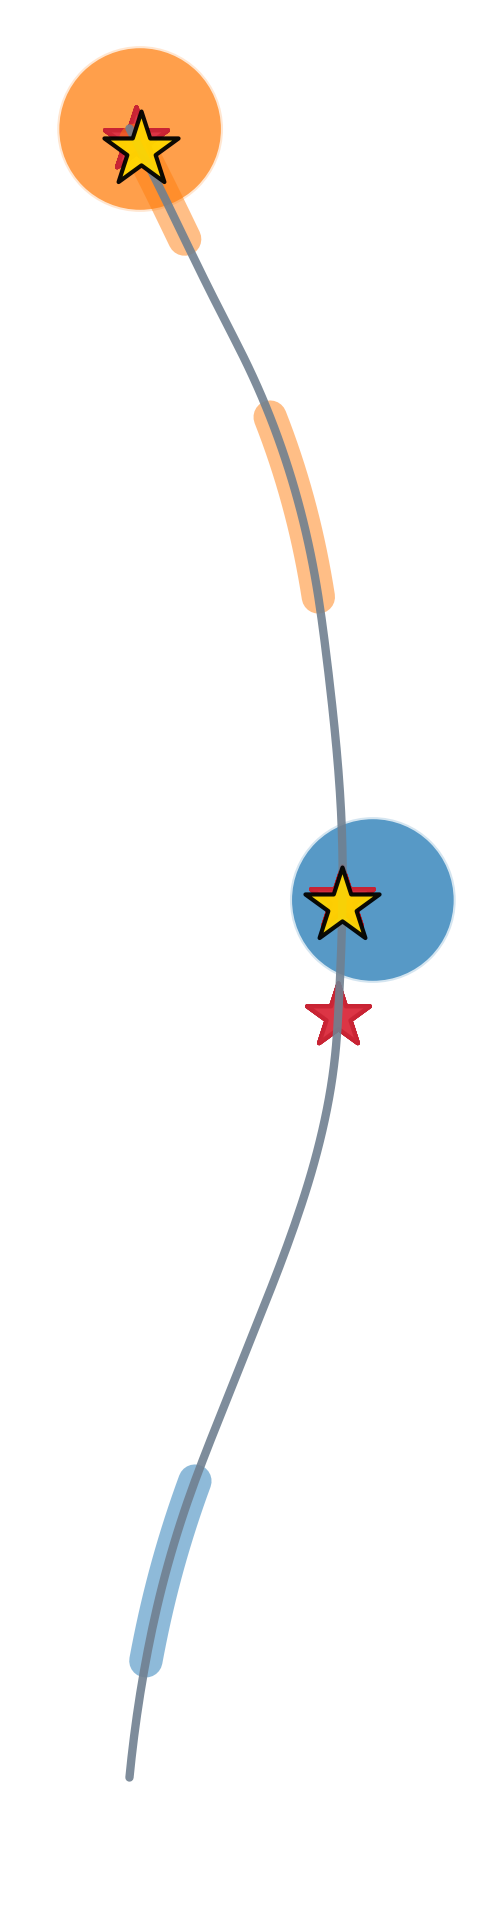

In [ ]:
stop_time = TAFT_sub['last_stop_time'].values[0]

show_visible_segments_ff_indices = [TAFT_sub['ff_index'].values[0], TAFT_sub['ff_index'].values[0]+1]

duration = [stop_time - 1.8, stop_time + 2]

plotting_kwargs_temp = copy.deepcopy(cgt.plotting_kwargs)
plotting_kwargs_temp.update(shared_kwargs)
plotting_kwargs_temp.update({'show_visible_segments_on_trajectory_ff_indices': show_visible_segments_ff_indices,
                            })

returned_info = plot_trials.PlotTrials(duration, 
            *cgt.PlotTrials_args,
            **plotting_kwargs_temp,         
            )


plt.title('')

plt.show()

## one stop: 0330 - 326

In [ ]:
cgt.make_one_stop_w_ff_df()
cgt.one_stop_w_ff_df

point_index nearby_alive_ff_indices  latest_visible_ff       time  \
0           1259                    [71]                 71   20.87794   
1           2994                   [157]                157   49.34650   
2           6072                   [161]                161   99.87535   
3          11171                    [71]                 71  183.50519   
4          15130                   [134]                134  248.49294   
..           ...                     ...                ...        ...   
112       212310                  [1782]               1782 3489.68258   
113       212377                  [1641]               1641 3490.79474   
114       215529                  [1251]               1251 3542.73515   
115       215945                  [1426]               1426 3549.57423   
116       217908                  [1264]               1264 3581.86064   

     ff_distance  stop_id  stop_cluster_id  stop_cluster_size  num_stops  \
0       42.00025        7                4                  1          1   
1       26.54089       29               20                  1          1   
2       44.15937       66               47                  1          1   
3       40.36354      134               92                  1          1   
4       33.17001      183              122                  1          1   
..           ...      ...              ...                ...        ...   
112     28.00728     2377             1570                  1          1   
113     43.84050     2378             1571                  1          1   
114     34.42667     2407             1590                  1          1   
115     25.73184     2412             1593                  1          1   
116     25.17133     2433             1607                  1          1   

     whether_w_ff_near_stops  stop_time  first_stop_time  \
0                          1   20.87794         20.87794   
1                          1   49.34650         49.34650   
2                          1   99.87535         99.87535   
3                          1  183.50519        183.50519   
4                          1  248.49294        248.49294   
..                       ...        ...              ...   
112                        1 3489.68258       3489.68258   
113                        1 3490.79474       3490.79474   
114                        1 3542.73515       3542.73515   
115                        1 3549.57423       3549.57423   
116                        1 3581.86064       3581.86064   

     first_stop_point_index stop_indices  target_index  
0                      1259       [1259]             6  
1                      2994       [2994]            18  
2                      6072       [6072]            37  
3                     11171      [11171]            71  
4                     15130      [15130]            95  
..                      ...          ...           ...  
112                  212310     [212310]          1235  
113                  212377     [212377]          1235  
114                  215529     [215529]          1251  
115                  215945     [215945]          1254  
116                  217908     [217908]          1264  

[117 rows x 15 columns]

In [ ]:
cgt.one_stop_w_ff_df

point_index nearby_alive_ff_indices  latest_visible_ff  target_index  \
0          1259                    [71]                 71             6   
1          2994                   [157]                157            18   
2         15130                   [134]                134            95   
3         22258              [319, 579]                319           137   
4         28233                   [189]                189           176   
..          ...                     ...                ...           ...   
76       195198                  [1261]               1261          1137   
77       197761                  [1762]               1762          1148   
78       212310                  [1782]               1782          1235   
79       212377                  [1641]               1641          1235   
80       215945                  [1426]               1426          1254   

         time  ff_distance  stop_id  stop_cluster_id  stop_cluster_size  \
0    20.87794     42.00025        7                4                  1   
1    49.34650     26.54089       29               21                  1   
2   248.49294     33.17001      183              135                  1   
3   365.58730     26.05535      274              199                  1   
4   463.74126     30.70313      347              248                  1   
..        ...          ...      ...              ...                ...   
76 3208.38414     32.51821     2201             1575                  1   
77 3250.61379     35.24426     2230             1594                  1   
78 3489.68258     28.00728     2377             1695                  1   
79 3490.79474     43.84050     2378             1696                  1   
80 3549.57423     25.73184     2412             1720                  1   

    num_stops  whether_w_ff_near_stops  trial  stop_time  first_stop_time  \
0           1                        1      6   20.87794         20.87794   
1           1                        1     18   49.34650         49.34650   
2           1                        1     95  248.49294        248.49294   
3           1                        1    137  365.58730        365.58730   
4           1                        1    176  463.74126        463.74126   
..        ...                      ...    ...        ...              ...   
76          1                        1   1137 3208.38414       3208.38414   
77          1                        1   1148 3250.61379       3250.61379   
78          1                        1   1235 3489.68258       3489.68258   
79          1                        1   1235 3490.79474       3490.79474   
80          1                        1   1254 3549.57423       3549.57423   

    first_stop_point_index stop_indices  
0                     1259       [1259]  
1                     2994       [2994]  
2                    15130      [15130]  
3                    22258      [22258]  
4                    28233      [28233]  
..                     ...          ...  
76                  195198     [195198]  
77                  197761     [197761]  
78                  212310     [212310]  
79                  212377     [212377]  
80                  215945     [215945]  

[81 rows x 16 columns]

In [ ]:
# Iteration 1
## trials = [152, 172, 173, 326, 327]
trials = [326]
one_stop_sub = cgt.one_stop_w_ff_df[cgt.one_stop_w_ff_df['target_index'].isin(trials)]

In [ ]:
cgt.make_one_stop_w_ff_df()

currentTrial: 357 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  357
duration: [971.168735, 975.168735]


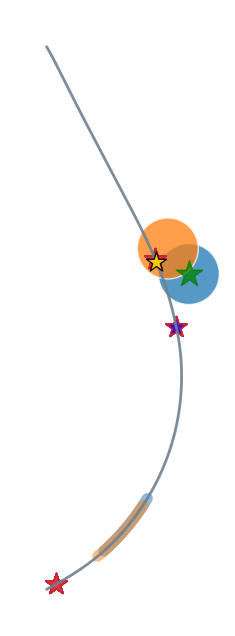

currentTrial: 362 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  362
duration: [989.976735, 993.976735]


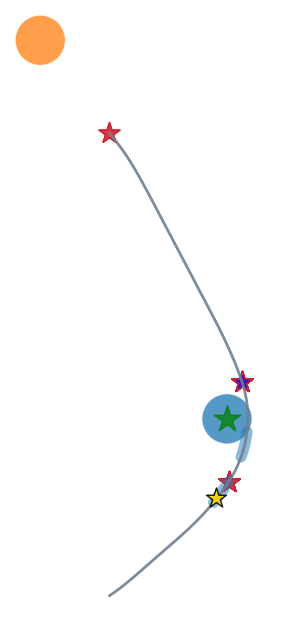

currentTrial: 363 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  363
duration: [991.935471, 995.935471]


currentTrial: 366 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  366
duration: [998.724739, 1002.724739]


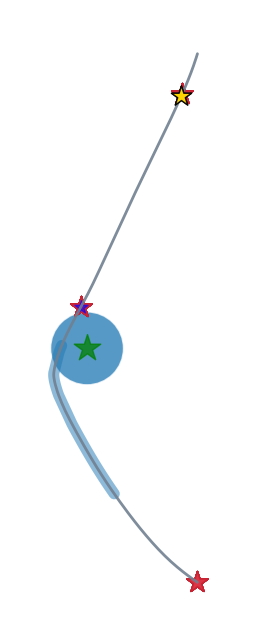

currentTrial: 372 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  372
duration: [1025.466825, 1029.466825]


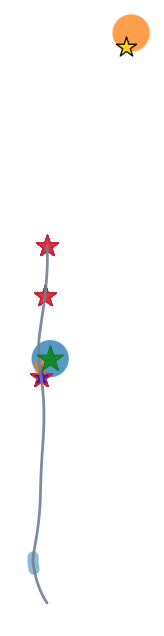

currentTrial: 372 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  372
duration: [1026.363194, 1030.363194]


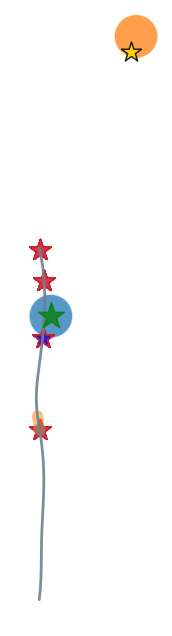

currentTrial: 374 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  374
duration: [1040.074558, 1044.074558]


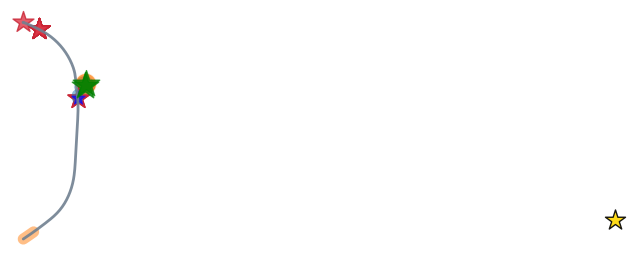

currentTrial: 405 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  405
duration: [1125.281056, 1129.281056]


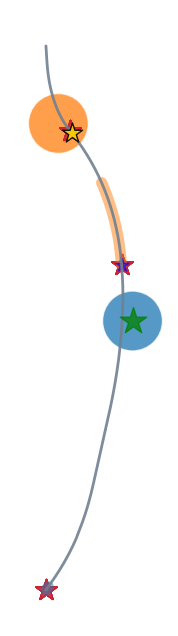

currentTrial: 406 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  406
duration: [1127.538342, 1131.538342]


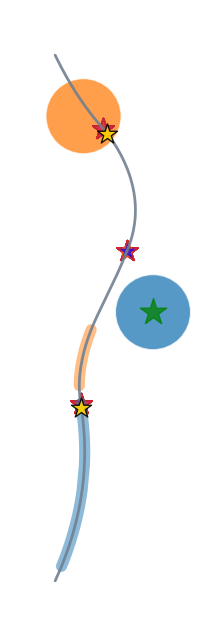

currentTrial: 438 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  438
duration: [1207.233442, 1211.233442]


currentTrial: 461 num_trials: 4
duration[0] updated to 1270.088061 to truncate the part of crossing arena edge
Since target_index is not provided, it is set to currentTrial:  461
duration: [np.float64(1270.088061), 1271.440482]


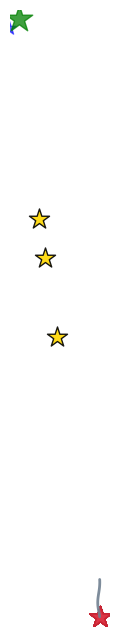

currentTrial: 472 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  472
duration: [1297.253571, 1301.253571]


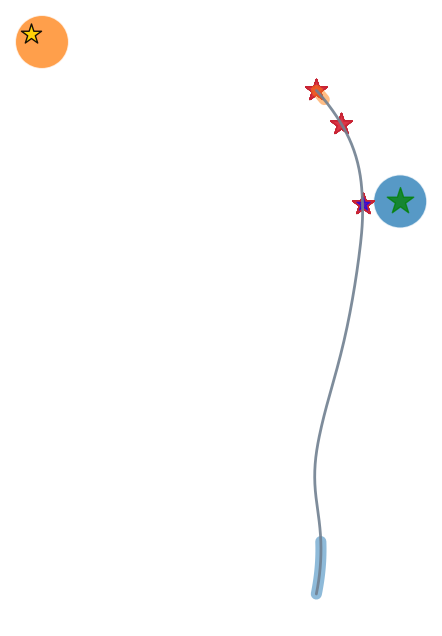

currentTrial: 499 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  499
duration: [1382.011586, 1386.011586]


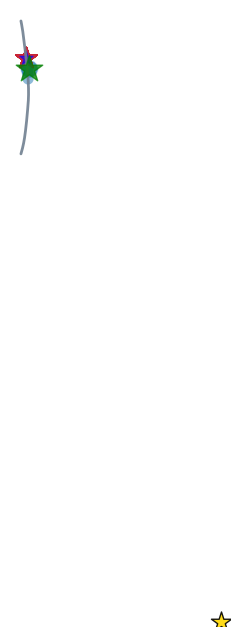

currentTrial: 520 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  520
duration: [1441.322134, 1445.322134]


currentTrial: 564 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  564
duration: [1557.935153, 1561.935153]


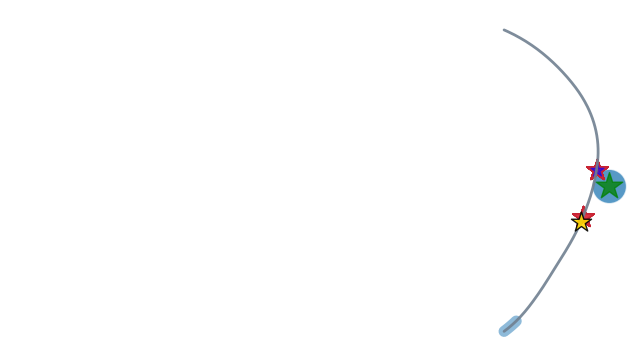

currentTrial: 585 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  585
duration: [1605.277457, 1609.277457]


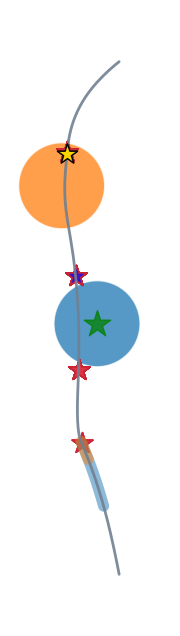

currentTrial: 587 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  587
duration: [1613.94251, 1617.94251]


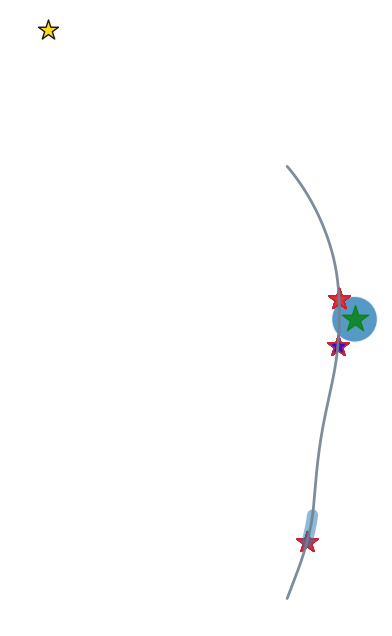

currentTrial: 587 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  587
duration: [1614.589939, 1618.589939]


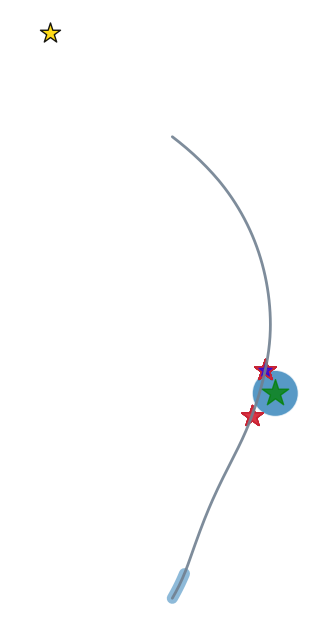

currentTrial: 602 num_trials: 1
The monkey crossed the arena edge at 1653.906417 but the duration is long enough (more than 2/3 of the original duration) to include the crossing
Since target_index is not provided, it is set to currentTrial:  602
duration: [1651.076028, 1655.076028]


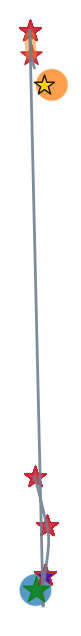

currentTrial: 608 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  608
duration: [1680.075495, 1684.075495]


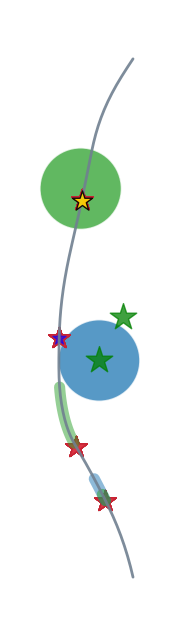

In [ ]:
counter = 0

for index, row in cgt.one_stop_w_ff_df.iloc[20:].iterrows():
#for index, row in one_stop_sub.iterrows():
    
    stop_time = row['time']
    point_indices_to_be_marked = [row['point_index']]
    indices_of_ff_to_mark = row['nearby_alive_ff_indices']
    point_indices_to_mark = [row['point_index']]
    show_visible_segments_ff_indices = row['nearby_alive_ff_indices'] + [row['target_index']]
    
    duration = [stop_time - 2, stop_time + 2]

    plotting_kwargs_temp = copy.deepcopy(cgt.plotting_kwargs)
    plotting_kwargs_temp.update(shared_kwargs)
    plotting_kwargs_temp.update({'show_visible_segments_on_trajectory_ff_indices': show_visible_segments_ff_indices,
                                 'indices_of_ff_to_mark': indices_of_ff_to_mark,
                                 'point_indices_to_be_marked_2nd_kind': point_indices_to_mark,
                                 'dpi': 100
                                })

    returned_info = plot_trials.PlotTrials(duration, 
                *cgt.PlotTrials_args,
                **plotting_kwargs_temp,         
                )
    
    
    plt.title('')

    plt.show()
    
    
    
    counter += 1
    if counter == 20:
        break


## one stop: 0326 - 137

In [ ]:
cgt.make_one_stop_w_ff_df()
cgt.one_stop_w_ff_df

point_index nearby_alive_ff_indices  latest_visible_ff       time  \
0          5580                    [24]                 24   92.07765   
1          5624                    [24]                 24   92.80782   
2         10641                   [270]                270  175.29209   
3         11520                   [171]                171  189.73379   
4         13259                   [203]                203  218.16908   
..          ...                     ...                ...        ...   
87       212741                   [946]                946 3505.17287   
88       213565                  [1598]               1598 3518.80120   
89       215850                   [926]                926 3556.66346   
90       217841                  [1093]               1093 3589.73132   
91       217898                  [1093]               1093 3590.67738   

    ff_distance  stop_id  stop_cluster_id  stop_cluster_size  num_stops  \
0      33.70037       55               34                  1          1   
1      25.94131       56               35                  1          1   
2      41.68093      120               71                  1          1   
3      36.22087      131               77                  1          1   
4      48.04258      154               91                  1          1   
..          ...      ...              ...                ...        ...   
87     43.43093     1684             1126                  1          1   
88     32.01793     1687             1129                  1          1   
89     25.95838     1696             1135                  1          1   
90     39.28074     1700             1138                  1          1   
91     28.78173     1701             1139                  1          1   

    whether_w_ff_near_stops  stop_time  first_stop_time  \
0                         1   92.07765         92.07765   
1                         1   92.80782         92.80782   
2                         1  175.29209        175.29209   
3                         1  189.73379        189.73379   
4                         1  218.16908        218.16908   
..                      ...        ...              ...   
87                        1 3505.17287       3505.17287   
88                        1 3518.80120       3518.80120   
89                        1 3556.66346       3556.66346   
90                        1 3589.73132       3589.73132   
91                        1 3590.67738       3590.67738   

    first_stop_point_index stop_indices  target_index  
0                     5580       [5580]            24  
1                     5624       [5624]            24  
2                    10641      [10641]            51  
3                    11520      [11520]            56  
4                    13259      [13259]            71  
..                     ...          ...           ...  
87                  212741     [212741]           922  
88                  213565     [213565]           924  
89                  215850     [215850]           926  
90                  217841     [217841]           927  
91                  217898     [217898]           927  

[92 rows x 15 columns]

In [ ]:
# Iteration 1
## trials = [152, 172, 173, 326, 327]
trials = [137]
one_stop_sub = cgt.one_stop_w_ff_df[cgt.one_stop_w_ff_df['target_index'].isin(trials)]

In [ ]:
counter = 0

#for index, row in cgt.one_stop_w_ff_df.iloc[20:].iterrows():
for index, row in one_stop_sub.iterrows():
    
    stop_time = row['time']
    point_indices_to_be_marked = [row['point_index']]
    indices_of_ff_to_mark = row['nearby_alive_ff_indices']
    show_visible_segments_ff_indices = row['nearby_alive_ff_indices'] + [row['target_index']]
    
    duration = [stop_time - 0.9, stop_time + 2]

    plotting_kwargs_temp = copy.deepcopy(cgt.plotting_kwargs)
    plotting_kwargs_temp.update(shared_kwargs)
    plotting_kwargs_temp.update({'show_visible_segments_on_trajectory_ff_indices': show_visible_segments_ff_indices,
                                })

    returned_info = plot_trials.PlotTrials(duration, 
                *cgt.PlotTrials_args,
                **plotting_kwargs_temp,         
                )
    
    
    plt.title('')

    plt.show()
    
    
    
    counter += 1
    if counter == 20:
        break


currentTrial: 137 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  137
duration: [387.00088600000004, 389.900886]


# debug

In [ ]:
cgt.one_stop_w_ff_df[cgt.one_stop_w_ff_df['target_index']==326]

point_index nearby_alive_ff_indices  latest_visible_ff      time  \
24        52076                   [326]                326 855.42761   

    ff_distance  stop_id  stop_cluster_id  stop_cluster_size  num_stops  \
24     25.93869      654              427                  1          1   

    whether_w_ff_near_stops  stop_time  first_stop_time  \
24                        1  855.42761        855.42761   

    first_stop_point_index stop_indices  target_index  
24                   52076      [52076]           326

In [ ]:
cgt.ff_caught_T_new[326]

np.float64(855.427615)

In [ ]:
cgt.ff_dataframe[cgt.ff_dataframe['ff_index']==326]

ff_index  point_index  visible  memory  time_since_last_vis      time  \
255438       326        43652        1     219              0.00000 716.93562   
255439       326        43653        1     219              0.00000 716.95221   
255440       326        43654        1     219              0.00000 716.96877   
255441       326        43655        1     219              0.00000 716.98541   
255442       326        43656        1     219              0.00000 717.00209   
...          ...          ...      ...     ...                  ...       ...   
256135       326        52072        0     162              0.94619 855.36124   
256136       326        52073        0     161              0.96278 855.37782   
256137       326        52074        0     160              0.97939 855.39444   
256138       326        52075        0     159              0.99596 855.41100   
256139       326        52076        0     158              1.01257 855.42761   

        target_index  monkey_x   monkey_y  monkey_angle  ...   target_y  \
255438           271  49.14000 -397.79373      -2.12515  ... -464.11883   
255439           271  47.41904 -400.61484      -2.11190  ... -464.11883   
255440           271  45.72374 -403.47870      -2.09868  ... -464.11883   
255441           271  44.09001 -406.32425      -2.08534  ... -464.11883   
255442           271  42.47886 -409.21844      -2.07197  ... -464.11883   
...              ...       ...        ...           ...  ...        ...   
256135           326 -64.82679 -825.65662      -2.79222  ... -819.10653   
256136           326 -65.44186 -825.88531      -2.79222  ... -819.10653   
256137           326 -65.80785 -826.02191      -2.79222  ... -819.10653   
256138           326 -65.98354 -826.08746      -2.79222  ... -819.10653   
256139           326 -65.98354 -826.08746      -2.79222  ... -819.10653   

        ffdistance2target  abs_ffangle_decreasing  \
255438          360.41566                 1.00000   
255439          360.41566                 1.00000   
255440          360.41566                 1.00000   
255441          360.41566                 1.00000   
255442          360.41566                 1.00000   
...                   ...                     ...   
256135            0.00000                -1.00000   
256136            0.00000                -1.00000   
256137            0.00000                -1.00000   
256138            0.00000                -1.00000   
256139            0.00000                -1.00000   

        abs_ffangle_boundary_decreasing  IS_TARGET  ff_index_string  \
255438                          1.00000      False              326   
255439                          1.00000      False              326   
255440                          1.00000      False              326   
255441                          1.00000      False              326   
255442                          1.00000      False              326   
...                                 ...        ...              ...   
256135                         -1.00000       True              326   
256136                         -1.00000       True              326   
256137                         -1.00000       True              326   
256138                         -1.00000       True              326   
256139                         -1.00000       True              326   

        dw_same_sign_as_ffangle  dw_same_sign_as_ffangle_boundary  \
255438                  1.00000                           1.00000   
255439                  1.00000                           1.00000   
255440                  1.00000                           1.00000   
255441                  1.00000                           1.00000   
255442                  1.00000                           1.00000   
...                         ...                               ...   
256135                  1.00000                           1.00000   
256136                 -1.00000                          -1.00000   
256137                 

In [ ]:
cgt.ff_dataframe[cgt.ff_dataframe['ff_index']==327]

ff_index  point_index  visible  memory  time_since_last_vis      time  \
256140       327        43672        1     219              0.00000 717.26749   
256141       327        43673        1     219              0.00000 717.28409   
256142       327        43674        1     219              0.00000 717.30080   
256143       327        43675        1     219              0.00000 717.31741   
256144       327        43676        1     219              0.00000 717.33395   
...          ...          ...      ...     ...                  ...       ...   
256548       327        52141        0     191              0.46463 856.47339   
256549       327        52142        0     190              0.48122 856.48998   
256550       327        52143        0     189              0.49783 856.50659   
256551       327        52144        0     188              0.51443 856.52319   
256552       327        52145        0     187              0.53102 856.53978   

        target_index   monkey_x   monkey_y  monkey_angle  ...   target_y  \
256140           271   22.89379 -455.57754      -1.87483  ... -464.11883   
256141           271   22.47566 -456.92017      -1.87404  ... -464.11883   
256142           271   22.14403 -457.99518      -1.87387  ... -464.11883   
256143           271   21.93317 -458.68228      -1.87387  ... -464.11883   
256144           271   21.87816 -458.86151      -1.87387  ... -464.11883   
...              ...        ...        ...           ...  ...        ...   
256548           327 -171.41717 -881.52277      -2.44739  ... -883.27852   
256549           327 -171.76211 -881.81641      -2.44739  ... -883.27852   
256550           327 -171.88106 -881.91779      -2.44739  ... -883.27852   
256551           327 -171.95839 -881.98364      -2.44739  ... -883.27852   
256552           327 -171.95844 -881.98364      -2.44739  ... -883.27852   

        ffdistance2target  abs_ffangle_decreasing  \
256140          457.34606                 1.00000   
256141          457.34606                 1.00000   
256142          457.34606                 1.00000   
256143          457.34606                 1.00000   
256144          457.34606                 1.00000   
...                   ...                     ...   
256548            0.00000                -1.00000   
256549            0.00000                -1.00000   
256550            0.00000                -1.00000   
256551            0.00000                -1.00000   
256552            0.00000                -1.00000   

        abs_ffangle_boundary_decreasing  IS_TARGET  ff_index_string  \
256140                          1.00000      False              327   
256141                          1.00000      False              327   
256142                          1.00000      False              327   
256143                          1.00000      False              327   
256144                          1.00000      False              327   
...                                 ...        ...              ...   
256548                          1.00000       True              327   
256549                         -1.00000       True              327   
256550                         -1.00000       True              327   
256551                         -1.00000       True              327   
256552                         -1.00000       True              327   

        dw_same_sign_as_ffangle  dw_same_sign_as_ffangle_boundary  \
256140                 -1.00000                          -1.00000   
256141                 -1.00000                          -1.00000   
256142                 -1.00000                          -1.00000   
256143                  1.00000                           1.00000   
256144                  1.00000                           1.00000   
...                         ...                               ...   
256548                  1.00000                           0.00000   
256549                  1.00000                           1.00000   
256550     

In [ ]:
cgt.monkey_information.loc[52145, 'whether_new_distinct_stop']


np.True_

In [ ]:
cgt.monkey_information.loc[cgt.monkey_information['stop_id']==767, ['point_index', 'time', 'stop_id', 'monkey_x', 'monkey_y', 'stop_cluster_id', 'stop_cluster_size']]


point_index       time  stop_id  monkey_x  monkey_y  stop_cluster_id  \
61404        61404 1009.17396      767 426.23297 794.16614              512   
61405        61405 1009.19053      767 426.23297 794.16614              512   
61406        61406 1009.20712      767 426.23297 794.16614              512   
61407        61407 1009.22376      767 426.23297 794.16614              512   
61408        61408 1009.24042      767 426.23297 794.16614              512   
61409        61409 1009.25330      767 426.23297 794.16614              512   
61410        61410 1009.26683      767 426.23297 794.16614              512   
61411        61411 1009.27049      767 426.23297 794.16614              512   
61412        61412 1009.27419      767 426.23297 794.16614              512   
61413        61413 1009.29015      767 426.23297 794.16614              512   
61414        61414 1009.30676      767 426.23297 794.16614              512   
61415        61415 1009.32338      767 426.23297 794.16614              512   
61416        61416 1009.33994      767 426.23297 794.16614              512   
61417        61417 1009.35655      767 426.23297 794.16614              512   
61418        61418 1009.37317      767 426.23297 794.16614              512   
61419        61419 1009.38977      767 426.23297 794.16614              512   
61420        61420 1009.40640      767 426.23297 794.16614              512   

       stop_cluster_size  
61404                  1  
61405                  1  
61406                  1  
61407                  1  
61408                  1  
61409                  1  
61410                  1  
61411                  1  
61412                  1  
61413                  1  
61414                  1  
61415                  1  
61416                  1  
61417                  1  
61418                  1  
61419                  1  
61420                  1

In [ ]:
cgt.monkey_information.loc[62945, 'stop_id']


np.int64(783)

In [ ]:
cgt.closest_stop_to_capture_df[cgt.closest_stop_to_capture_df['cur_ff_index']>392]

time  point_index  caught_time  diff_from_caught_time  cur_ff_index  \
393 1031.93566        62852   1031.93566               -0.00000           393   
394 1033.44590        62945   1033.44590               -0.00000           394   
395 1035.12274        63048   1035.12274               -0.00000           395   
396 1043.91971        63579   1043.91971               -0.00000           396   
397 1045.39763        63670   1045.39763               -0.00000           397   
..         ...          ...          ...                    ...           ...   
924 3522.08799       213763   3522.08799               -0.00000           924   
925 3524.64427       213919   3524.64427               -0.00000           925   
926 3556.66346       215850   3556.66346               -0.00000           926   
927 3592.17100       217988   3592.17100               -0.00000           927   
928 3598.19745       218353   3598.81142               -0.61397           928   

     stop_point_index  stop_time  distance_from_ff_to_stop  \
393             62852 1031.93566                  13.19685   
394             62945 1033.44590                  29.30233   
395             63048 1035.12274                  14.74691   
396             63579 1043.91971                  16.02608   
397             63670 1045.39763                  13.21478   
..                ...        ...                       ...   
924            213763 3522.08799                   6.11456   
925            213919 3524.64427                  19.86143   
926            215850 3556.66346                  25.95838   
927            217988 3592.17100                   4.23837   
928            218353 3598.19745                  49.86652   

     whether_stop_inside_boundary  ff_caught_T_new  \
393                          True       1031.93566   
394                         False       1033.44590   
395                          True       1035.12274   
396                          True       1043.91971   
397                          True       1045.39763   
..                            ...              ...   
924                          True       3522.08799   
925                          True       3524.64427   
926                         False       3556.66346   
927                          True       3592.17100   
928                         False       3598.81142   

     ff_caught_T_new_point_index  
393                        62852  
394                        62946  
395                        63048  
396                        63579  
397                        63670  
..                           ...  
924                       213763  
925                       213919  
926                       215851  
927                       217988  
928                       218391  

[536 rows x 11 columns]

In [ ]:
cgt.closest_stop_to_capture_df[cgt.closest_stop_to_capture_df['cur_ff_index']==394]

time  point_index  caught_time  diff_from_caught_time  cur_ff_index  \
394 1033.44590        62945   1033.44590               -0.00000           394   

     stop_point_index  stop_time  distance_from_ff_to_stop  \
394             62945 1033.44590                  29.30233   

     whether_stop_inside_boundary  ff_caught_T_new  \
394                         False       1033.44590   

     ff_caught_T_new_point_index  
394                        62946

ff_index  point_index  visible  memory  time_since_last_vis  \
348499       394        31764        1     218              0.00000   
348500       394        31765        1     218              0.00000   
348501       394        31766        1     218              0.00000   
348502       394        31767        1     218              0.00000   
348503       394        31768        1     218              0.00000   
...          ...          ...      ...     ...                  ...   
350583       394        62941        0     139              1.31107   
350584       394        62942        0     138              1.32766   
350585       394        62943        0     137              1.34432   
350586       394        62944        0     136              1.36098   
350587       394        62945        0     135              1.37752   

             time  target_index  monkey_x  monkey_y  monkey_angle  ...  \
348499  521.56065           199 860.05457  -9.60585      -3.12033  ...   
348500  521.57723           199 859.53107  -9.60855       3.13180  ...   
348501  521.59381           199 859.00769  -9.59770       3.08718  ...   
348502  521.61042           199 858.48090  -9.57309       3.05252  ...   
348503  521.62722           199 857.95874  -9.53504       3.04069  ...   
...           ...           ...       ...       ...           ...  ...   
350583 1033.37945           394 597.38593 226.52338       0.27634  ...   
350584 1033.39604           394 598.00861 226.70432       0.27634  ...   
350585 1033.41270           394 598.39105 226.81589       0.27634  ...   
350586 1033.42935           394 598.59351 226.87494       0.27634  ...   
350587 1033.44590           394 598.59351 226.87494       0.27634  ...   

        target_y  ffdistance2target  abs_ffangle_decreasing  \
348499   0.14204          244.93449                 1.00000   
348500   0.14204          244.93449                 1.00000   
348501   0.14204          244.93449                 1.00000   
348502   0.14204          244.93449                 1.00000   
348503   0.14204          244.93449                 1.00000   
...          ...                ...                     ...   
350583 225.44737            0.00000                -1.00000   
350584 225.44737            0.00000                -1.00000   
350585 225.44737            0.00000                -1.00000   
350586 225.44737            0.00000                -1.00000   
350587 225.44737            0.00000                -1.00000   

        abs_ffangle_boundary_decreasing  IS_TARGET  ff_index_string  \
348499                          1.00000      False              394   
348500                          1.00000      False              394   
348501                          1.00000      False              394   
348502                          1.00000      False              394   
348503                          1.00000      False              394   
...                                 ...        ...              ...   
350583                         -1.00000       True              394   
350584                         -1.00000       True              394   
350585                         -1.00000       True              394   
350586                         -1.00000       True              394   
350587                         -1.00000       True              394   

        dw_same_sign_as_ffangle  dw_same_sign_as_ffangle_boundary  \
348499                  1.00000                           1.00000   
348500                  1.00000                           1.00000   
348501                  1.00000                           1.00000   
348502                  1.00000                           1.00000   
348503                  1.00000                           1.00000   
...                         ...                               ...   
350583                  1.00000                           1.00000   
350584                  1.00000                           1.00000   
350585                 -1.00000    

## iterate

In [ ]:
# Iteration 1
## trials = [152, 172, 173, 326, 327]
# trials = [977, 883, 326, 382, 486, 507, 794]


trials = [368] # debug
one_stop_sub = cgt.one_stop_w_ff_df[cgt.one_stop_w_ff_df['target_index'].isin(trials)]
one_stop_sub

point_index nearby_alive_ff_indices  latest_visible_ff       time  \
37        61404                   [454]                454 1009.17396   

    ff_distance  stop_id  stop_cluster_id  stop_cluster_size  num_stops  \
37     47.03816      767              512                  1          1   

    whether_w_ff_near_stops  stop_time  first_stop_time  \
37                        1 1009.17396       1009.17396   

    first_stop_point_index stop_indices  target_index  
37                   61404      [61404]           368

currentTrial: 374 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  374
duration: [1039.574558, 1044.074558]


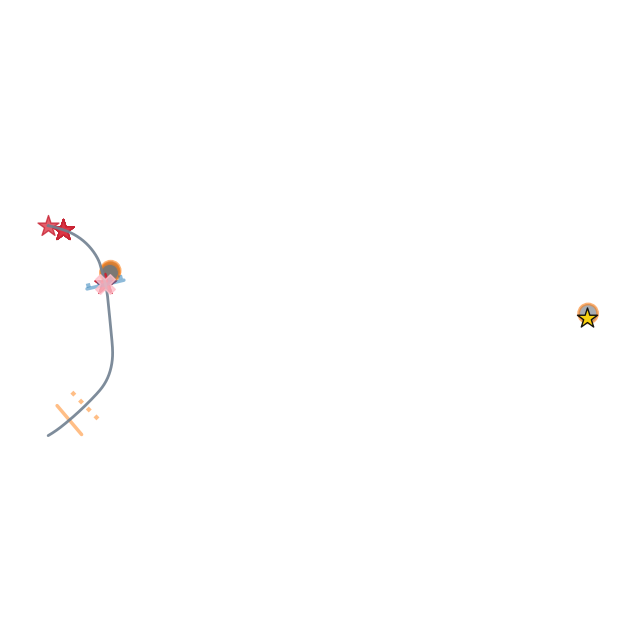

currentTrial: 383 num_trials: 3
Since target_index is not provided, it is set to currentTrial:  383
duration: [1059.792976, 1064.292976]


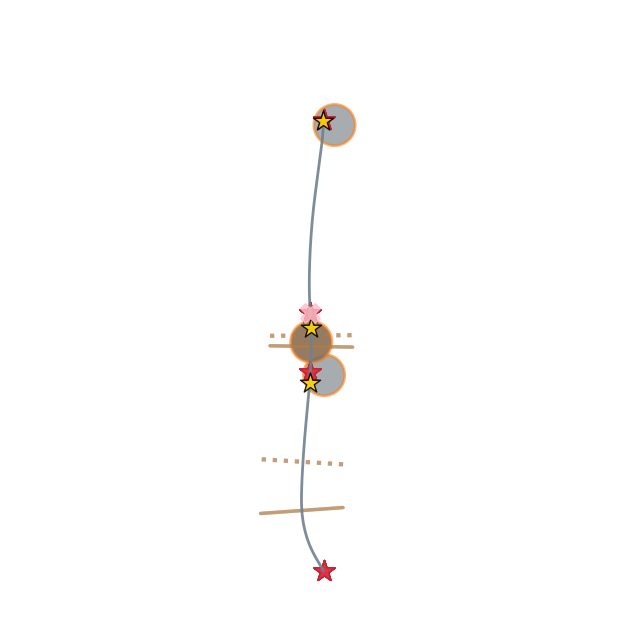

currentTrial: 405 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  405
duration: [1124.781056, 1129.281056]


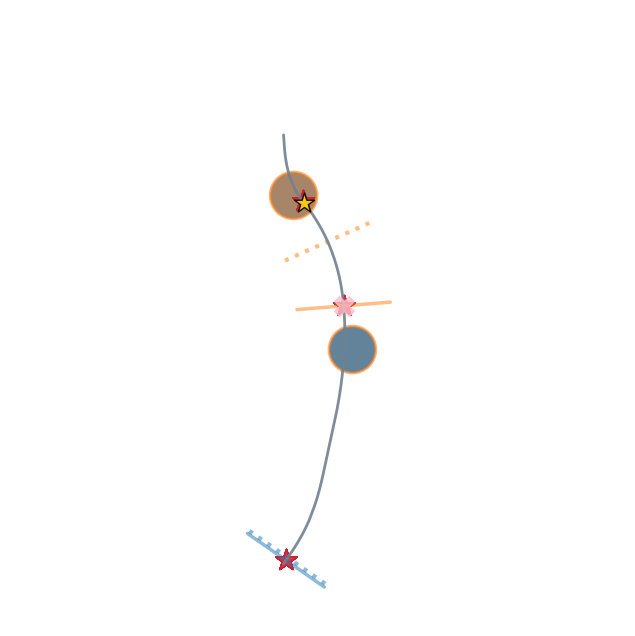

currentTrial: 406 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  406
duration: [1127.038342, 1131.538342]


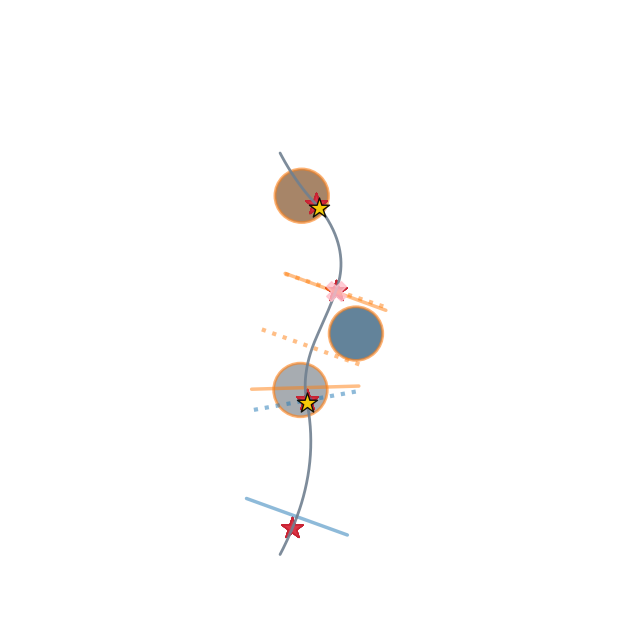

currentTrial: 419 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  419
duration: [1148.086721, 1152.586721]


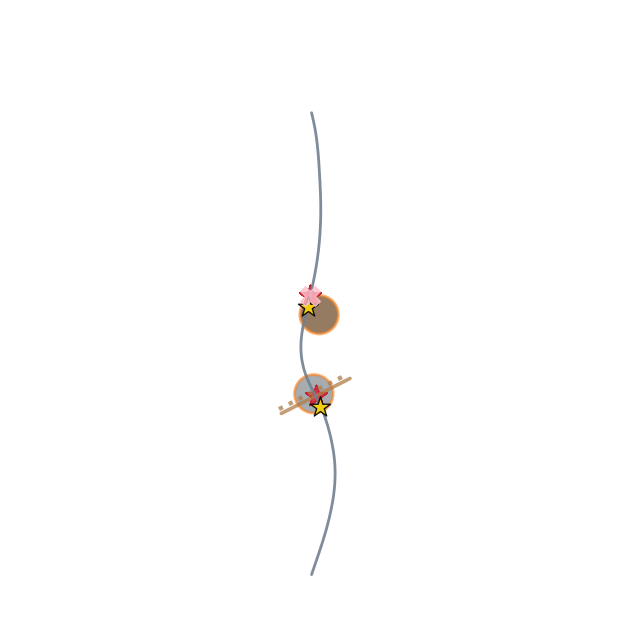

currentTrial: 431 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  431
duration: [1185.037684, 1189.537684]


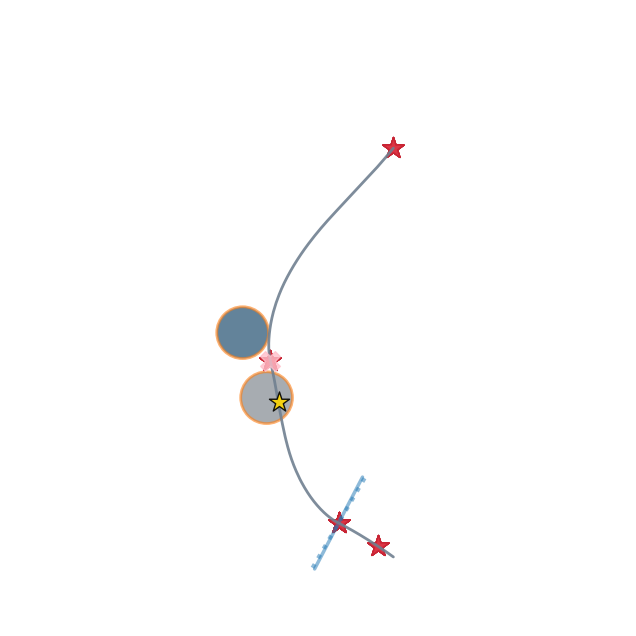

currentTrial: 438 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  438
duration: [1206.733442, 1211.233442]


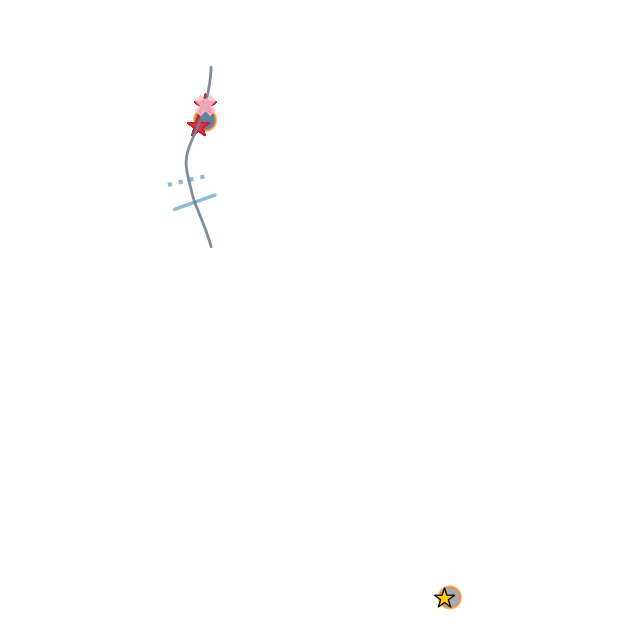

currentTrial: 461 num_trials: 4
The monkey crossed the arena edge at 1270.088061 but the duration is long enough (more than 2/3 of the original duration) to include the crossing
Since target_index is not provided, it is set to currentTrial:  461
duration: [1266.940482, 1271.440482]


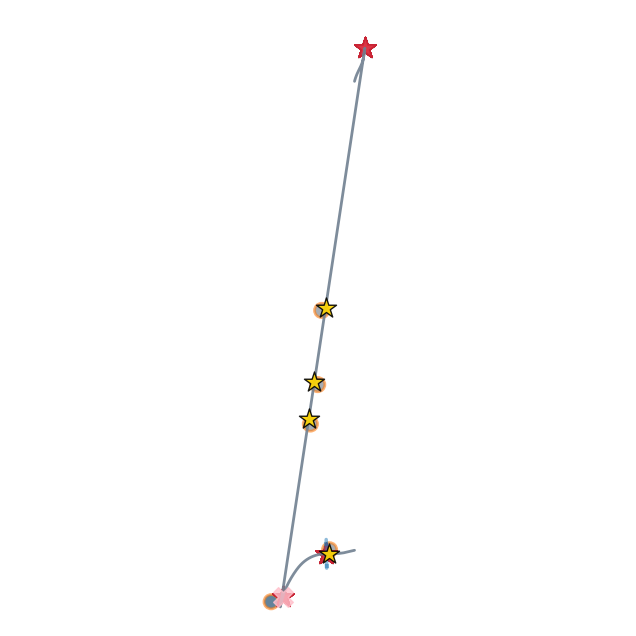

currentTrial: 472 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  472
duration: [1296.753571, 1301.253571]


currentTrial: 499 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  499
duration: [1381.511586, 1386.011586]


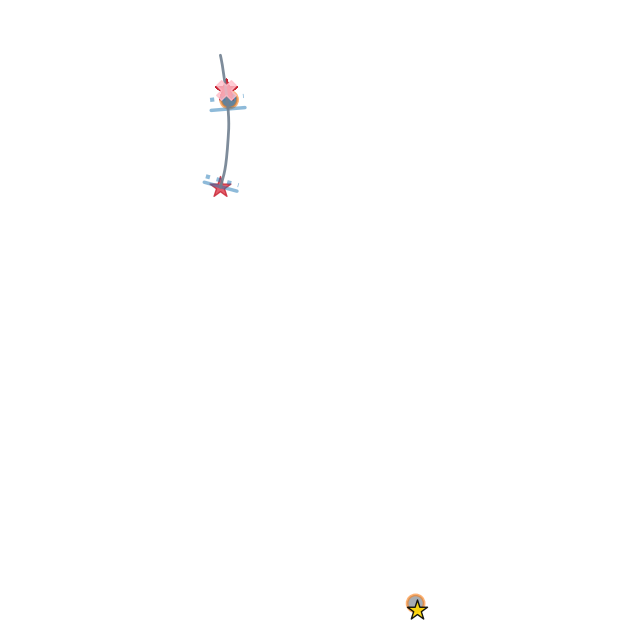

currentTrial: 520 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  520
duration: [1440.822134, 1445.322134]


currentTrial: 538 num_trials: 4
Since target_index is not provided, it is set to currentTrial:  538
duration: [1489.542384, 1494.042384]


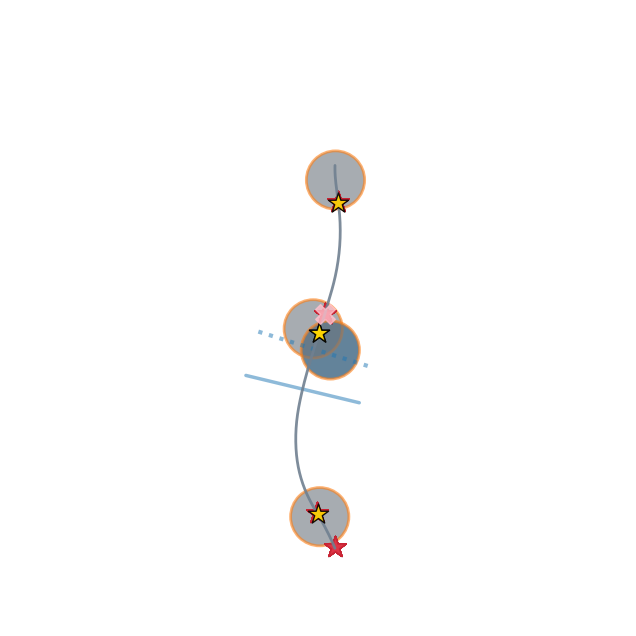

currentTrial: 544 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  544
duration: [1501.079232, 1505.579232]


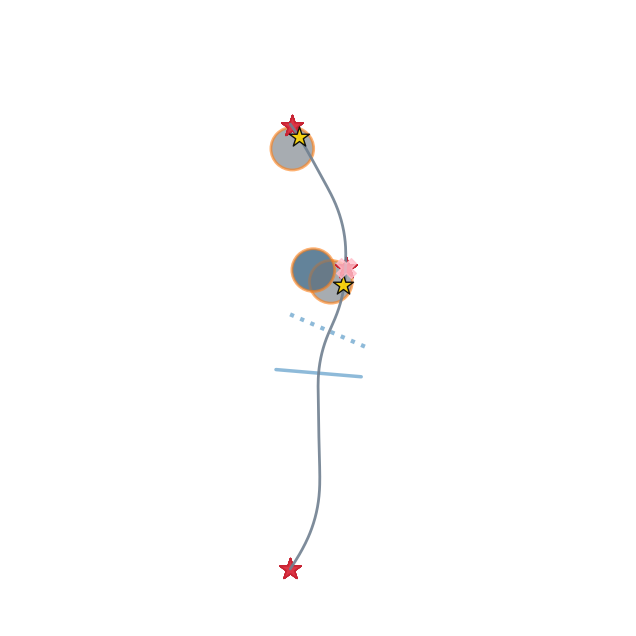

currentTrial: 564 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  564
duration: [1557.435153, 1561.935153]


currentTrial: 585 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  585
duration: [1604.777457, 1609.277457]


currentTrial: 587 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  587
duration: [1613.44251, 1617.94251]


currentTrial: 587 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  587
duration: [1614.089939, 1618.589939]


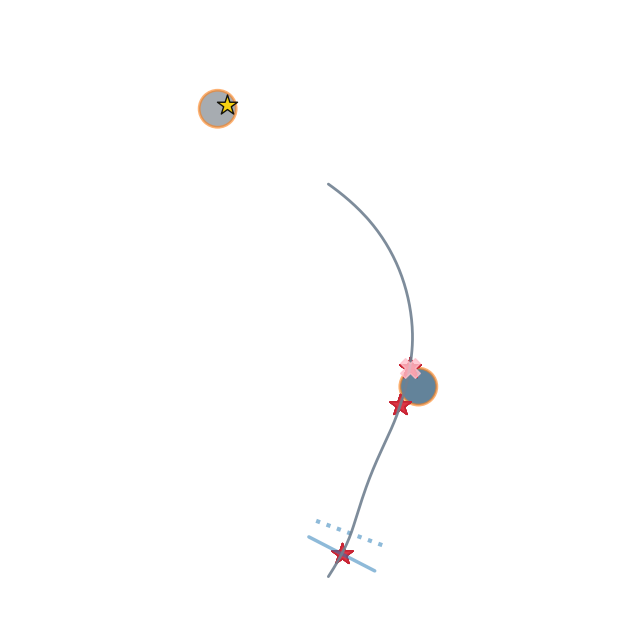

currentTrial: 601 num_trials: 1
The monkey crossed the arena edge at 1653.906417 but the duration is long enough (more than 2/3 of the original duration) to include the crossing
Since target_index is not provided, it is set to currentTrial:  601
duration: [1650.576028, 1655.076028]


currentTrial: 608 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  608
duration: [1679.575495, 1684.075495]


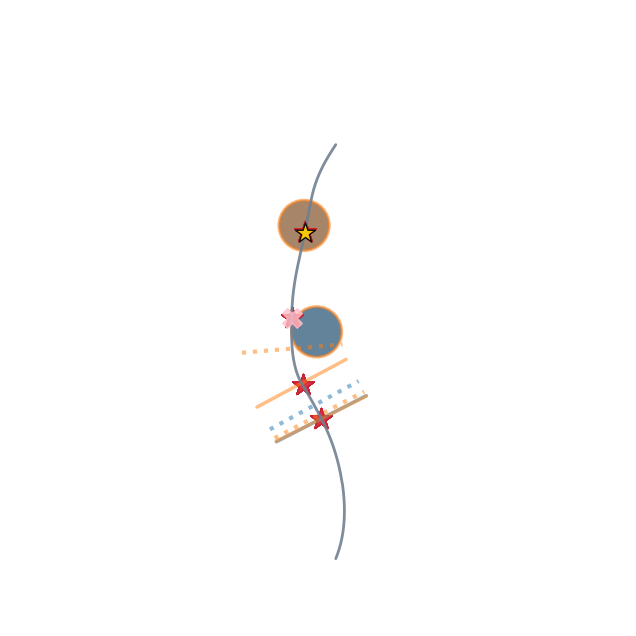

currentTrial: 615 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  615
duration: [1697.735415, 1702.235415]


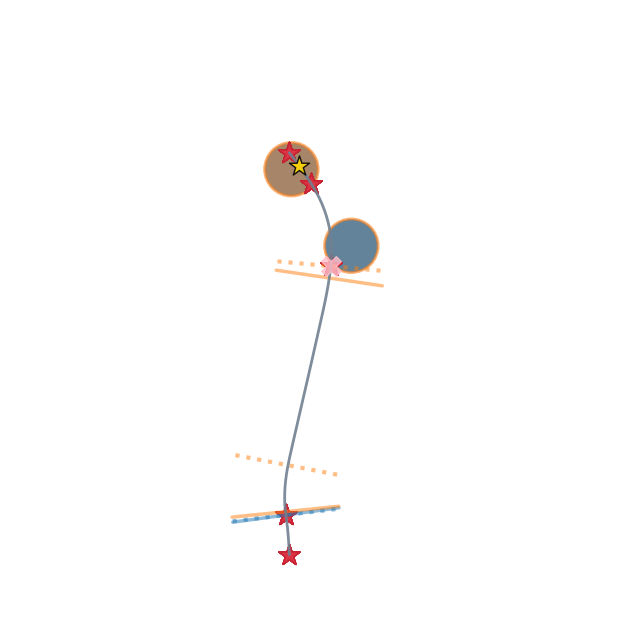

In [ ]:
counter = 0


for index, row in cgt.one_stop_w_ff_df.iloc[40:].iterrows():
# for index, row in one_stop_sub.iterrows():
    
    stop_time = row['time']
    point_indices_to_be_marked = [row['point_index']]
    indices_of_ff_to_mark = row['nearby_alive_ff_indices']
    show_visible_segments_ff_indices = row['nearby_alive_ff_indices'] + [row['target_index']]
    
    duration = [stop_time - 2.5, stop_time + 2]

    plotting_kwargs_temp = copy.deepcopy(cgt.plotting_kwargs)
    plotting_kwargs_temp.update({'show_path_when_target_visible': False,
                                'show_connect_path_ff': False,
                                'show_alive_fireflies': False,
                                'show_visible_fireflies': False,
                                'show_alive_fireflies': False,
                                'show_connect_path_ff_memory': False,
                                'show_believed_target_positions': True,
                                'point_indices_to_be_marked_3rd_kind': point_indices_to_be_marked,
                                #'indices_of_ff_to_mark': indices_of_ff_to_mark,
                                'show_visible_segments_ff_indices': show_visible_segments_ff_indices,
                                'show_scale_bar': False,
                                'show_start': False,
                                })

    returned_info = plot_trials.PlotTrials(duration, 
                *cgt.PlotTrials_args,
                **plotting_kwargs_temp,         
                )
    
    
    plt.title('')

    plt.show()
    
    
    
    counter += 1
    if counter == 20:
        break


# For ppt

## Exp

In [ ]:
cgt.one_stop_w_ff_df

In [ ]:
sort_1_trials = sort_1_df.target_index.values
sort_1_name = "Try a few times"

sort_2_df = cgt.GUAT_cluster_df
sort_2_trials = sort_2_df.target_index.values

NameError: name 'sort_1_df' is not defined

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]

for trial in sort_1_trials[60:80]:
    duration_to_plot = [cgt.ff_caught_T_new[trial] - 3, cgt.ff_caught_T_new[trial] + 1]

    max_num_plot_to_make = 1
    ff_indices_to_plot_null_arc = np.array([trial]) #np.array([908, 723, 724])
    intended_target_ff_index = None #749
    point_indices_to_plot_null_arc = []
    pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
    pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
    #pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
    pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
    pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
    pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

    pretty_null_arc_plot_kwargs_temp.update({'show_start': False})

    time_to_begin_plotting_null_arc = None
    time_between_every_two_null_arcs = 0.3

    updated_args = {'title': ''}


    show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                            plot_null_arcs= False, ff_max_distance_to_intended_target=230, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                            show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                            **updated_args)


## TAFT (retry)

currentTrial: 724 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  724
duration: [1856.504211, 1862.693883]


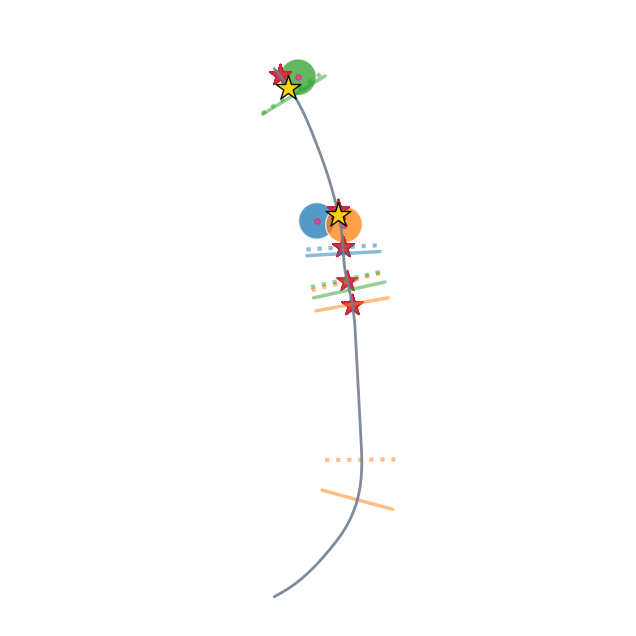

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1856.504211, 1862.693883]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([908, 723, 724])
intended_target_ff_index = None #749
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

pretty_null_arc_plot_kwargs_temp.update({'show_start': False})

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3

updated_args = {'title': ''}



show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=230, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        **updated_args)


## GUAT (switch)

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1537.023148, 1542.046287]
max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([598, 599, 627])
intended_target_ff_index = 717
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

pretty_null_arc_plot_kwargs_temp.update({'show_start': False})

time_to_begin_plotting_null_arc = duration_to_plot[0] + 3
time_between_every_two_null_arcs = 0.3

updated_args = {'title': ''}

show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        **updated_args)



currentTrial: 42 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  42
duration: [134.22936, 136.22936]


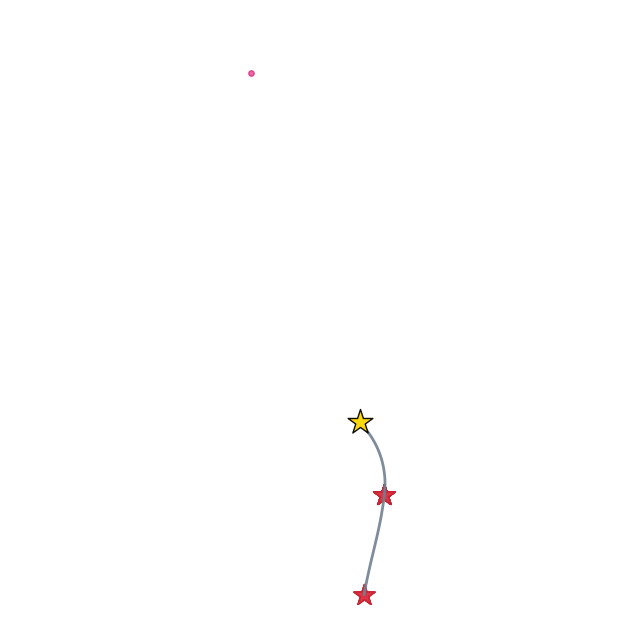

In [ ]:
stop_time = 135.22936
duration_to_plot = [stop_time - 1, stop_time + 1]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([trial]) #np.array([908, 723, 724])
intended_target_ff_index = None #749
point_indices_to_plot_null_arc = []
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

pretty_null_arc_plot_kwargs_temp.update({'show_start': False})

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3

updated_args = {'title': ''}


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=230, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        **updated_args)


# For ppt

## Exp

In [ ]:
cgt.make_one_stop_w_ff_df()

In [ ]:
sort_1_trials = sort_1_df.target_index.values
sort_1_name = "Try a few times"

sort_2_df = cgt.GUAT_cluster_df
sort_2_trials = sort_2_df.target_index.values

currentTrial: 194 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  194
duration: [np.float64(525.293333), np.float64(529.293333)]


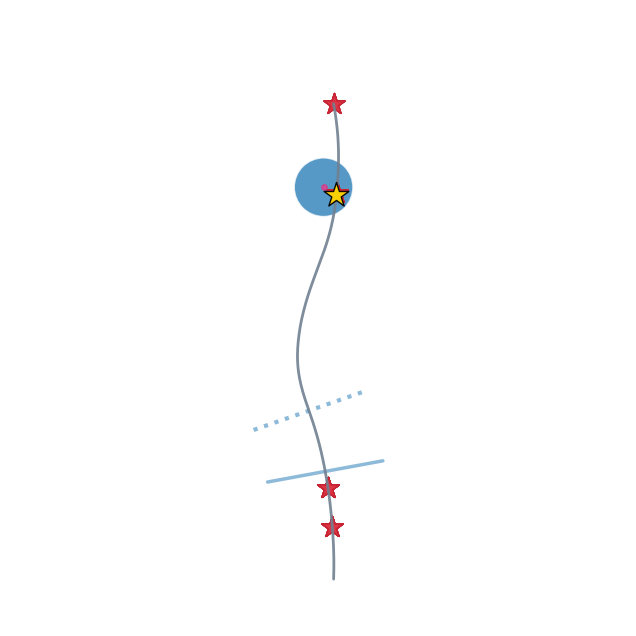

currentTrial: 196 num_trials: 1
duration[0] updated to 533.821238 to truncate the part of crossing arena edge
Since target_index is not provided, it is set to currentTrial:  196
duration: [np.float64(533.821238), np.float64(536.198851)]


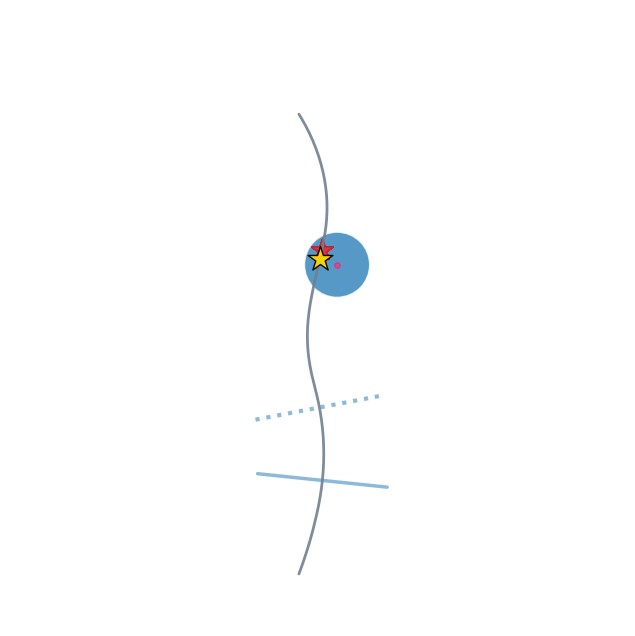

currentTrial: 199 num_trials: 2
duration[0] updated to 541.672837 to truncate the part of crossing arena edge
Since target_index is not provided, it is set to currentTrial:  199
duration: [np.float64(541.672837), np.float64(545.112874)]


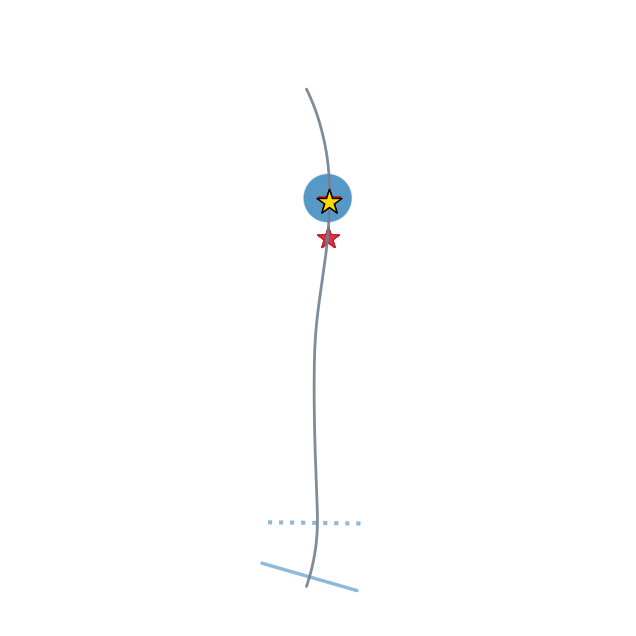

currentTrial: 199 num_trials: 2
duration[0] updated to 541.672837 to truncate the part of crossing arena edge
Since target_index is not provided, it is set to currentTrial:  199
duration: [np.float64(541.672837), np.float64(545.112874)]


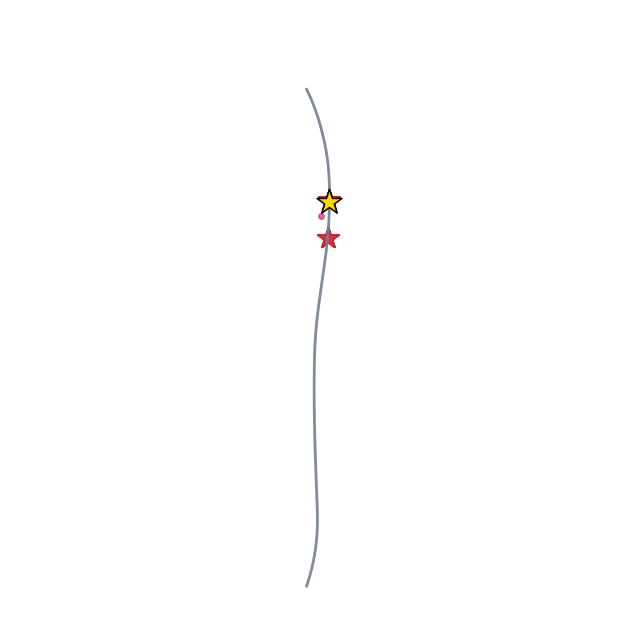

currentTrial: 205 num_trials: 4
Since target_index is not provided, it is set to currentTrial:  205
duration: [np.float64(549.811139), np.float64(553.811139)]


currentTrial: 206 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  206
duration: [np.float64(554.741201), np.float64(558.741201)]


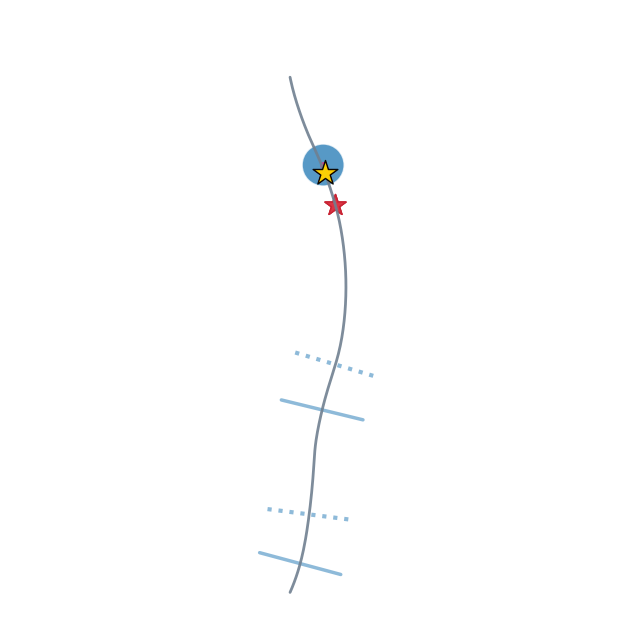

currentTrial: 209 num_trials: 3
Since target_index is not provided, it is set to currentTrial:  209
duration: [np.float64(559.671311), np.float64(563.671311)]


currentTrial: 212 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  212
duration: [np.float64(573.432488), np.float64(577.432488)]


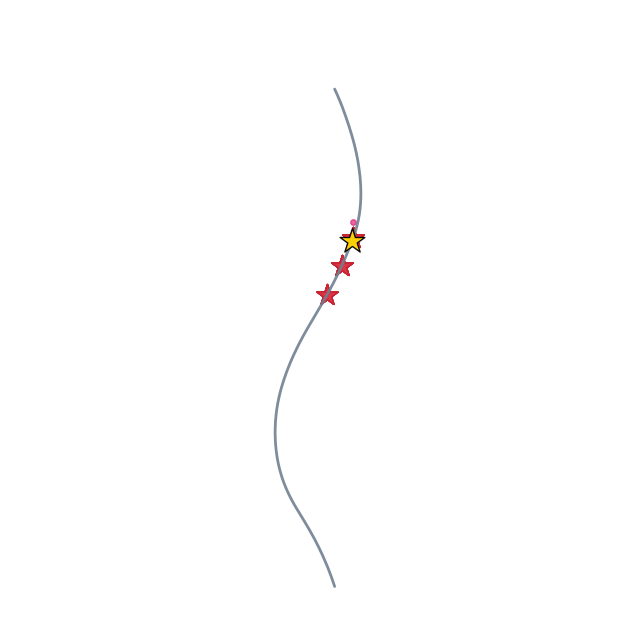

currentTrial: 213 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  213
duration: [np.float64(578.163405), np.float64(582.163405)]


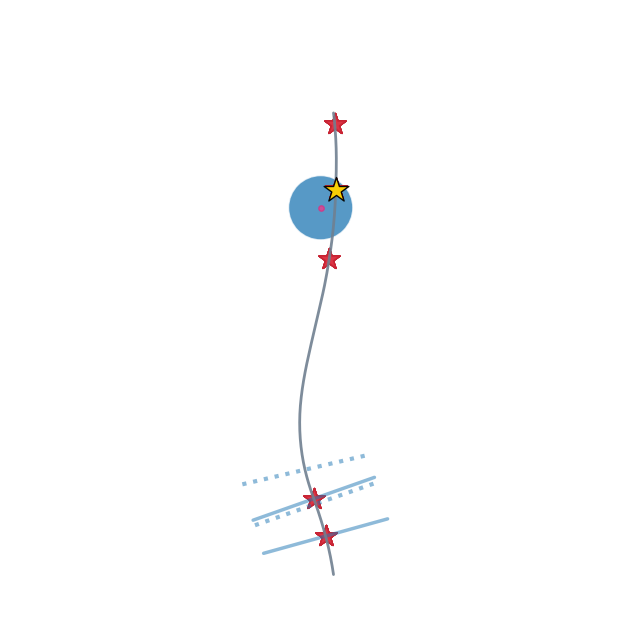

currentTrial: 214 num_trials: 2
The monkey crossed the arena edge at 583.205319 but the duration is long enough (more than 2/3 of the original duration) to include the crossing
Since target_index is not provided, it is set to currentTrial:  214
duration: [np.float64(579.441559), np.float64(583.441559)]


currentTrial: 216 num_trials: 2
duration[0] updated to 583.205319 to truncate the part of crossing arena edge
Since target_index is not provided, it is set to currentTrial:  216
duration: [np.float64(583.205319), np.float64(586.545668)]


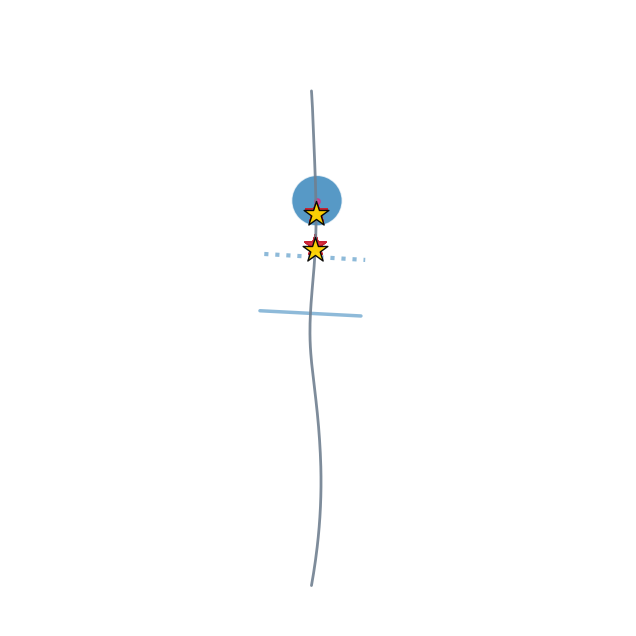

currentTrial: 221 num_trials: 3
Since target_index is not provided, it is set to currentTrial:  221
duration: [np.float64(595.808857), np.float64(599.808857)]


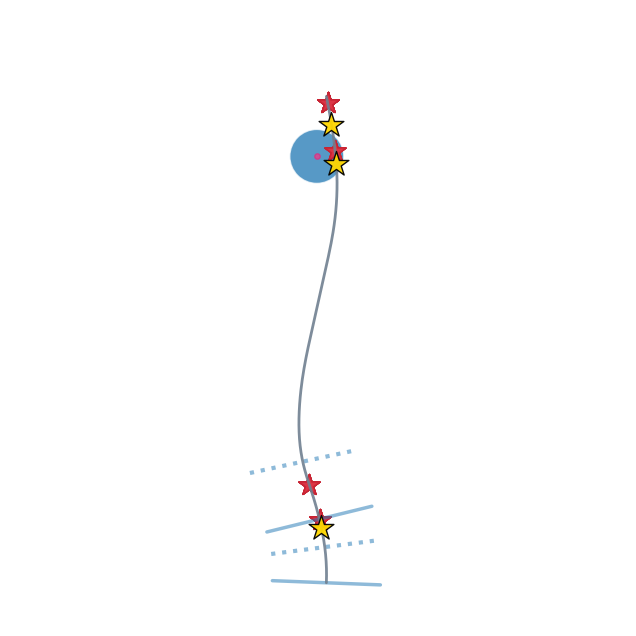

currentTrial: 221 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  221
duration: [np.float64(596.306829), np.float64(600.306829)]


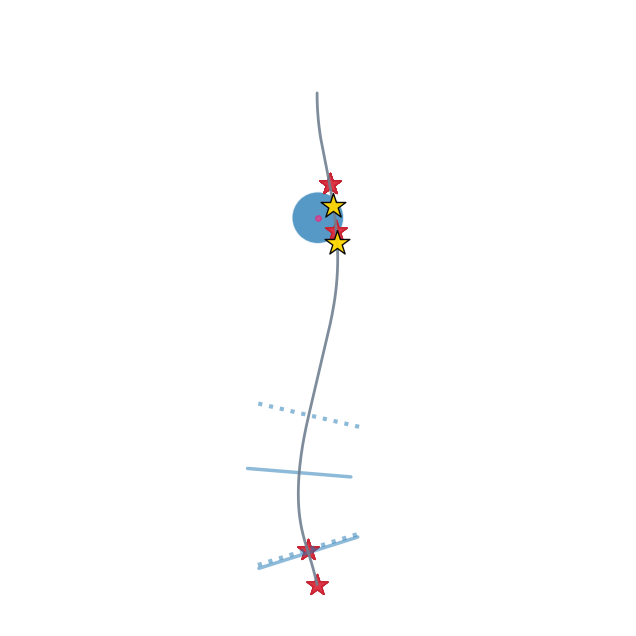

currentTrial: 225 num_trials: 3
Since target_index is not provided, it is set to currentTrial:  225
duration: [np.float64(602.282449), np.float64(606.282449)]


currentTrial: 228 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  228
duration: [np.float64(609.121826), np.float64(613.121826)]


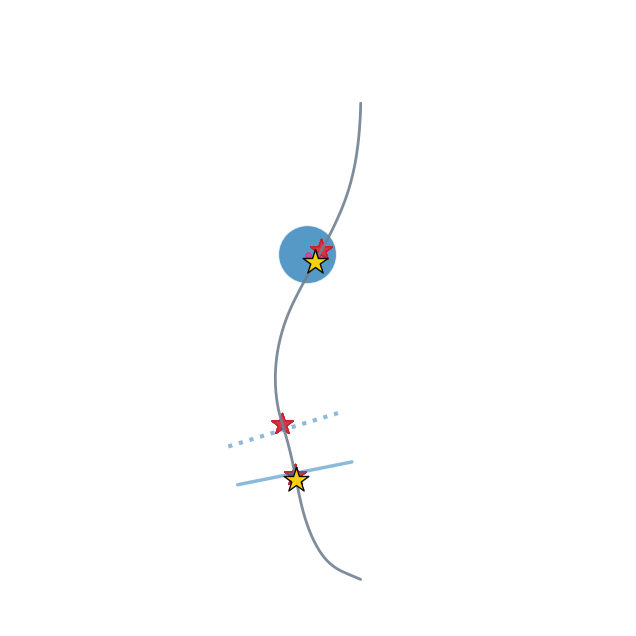

currentTrial: 233 num_trials: 2
The monkey crossed the arena edge at 622.148188 but the duration is long enough (more than 2/3 of the original duration) to include the crossing
Since target_index is not provided, it is set to currentTrial:  233
duration: [np.float64(618.517246), np.float64(622.517246)]


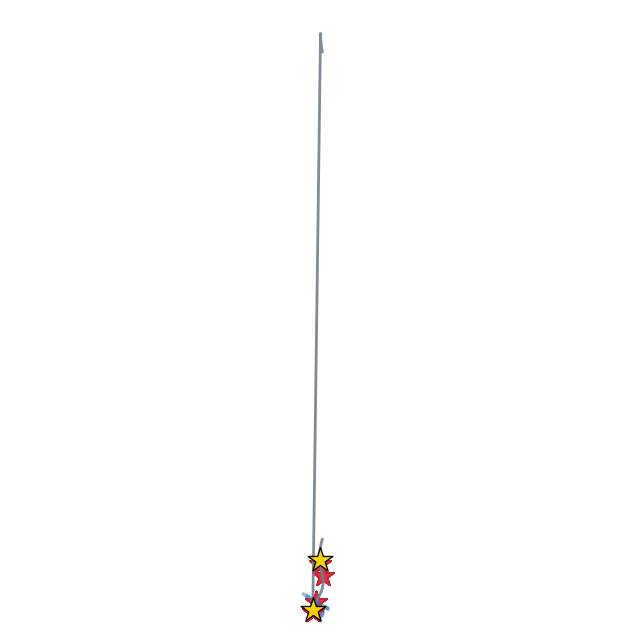

currentTrial: 234 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  234
duration: [np.float64(622.15231), np.float64(626.15231)]


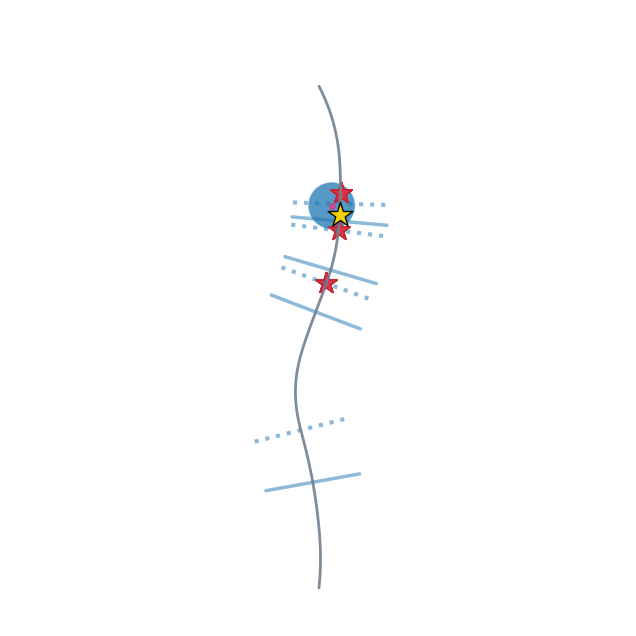

currentTrial: 237 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  237
duration: [np.float64(627.232039), np.float64(631.232039)]


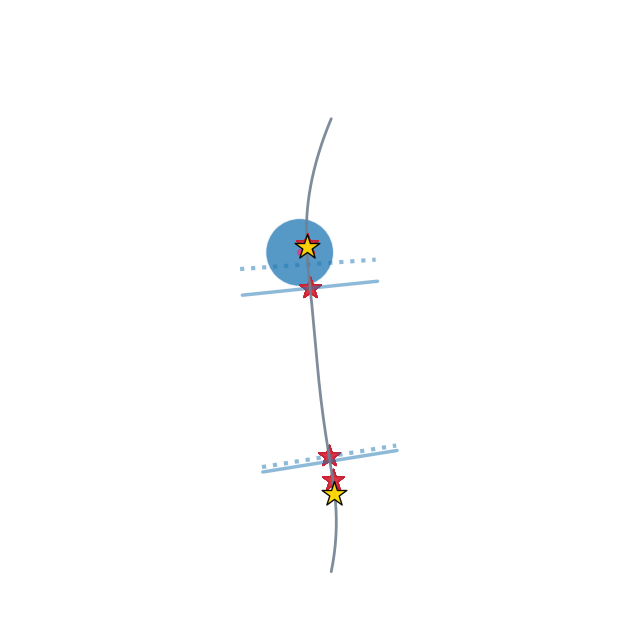

currentTrial: 242 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  242
duration: [np.float64(640.760807), np.float64(644.760807)]


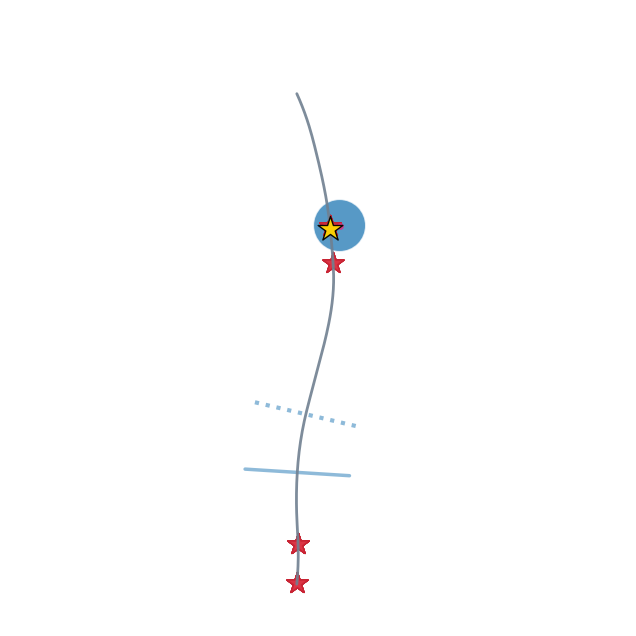

currentTrial: 243 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  243
duration: [np.float64(642.404172), np.float64(646.404172)]


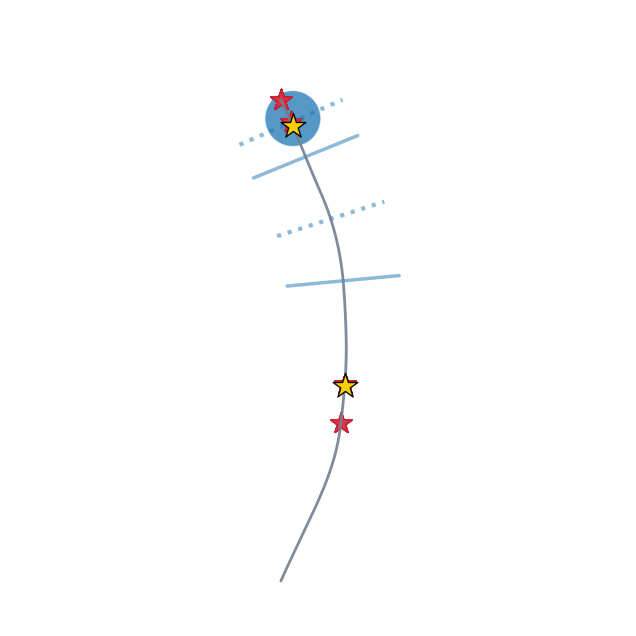

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]

for trial in sort_1_trials[60:80]:
    duration_to_plot = [cgt.ff_caught_T_new[trial] - 3, cgt.ff_caught_T_new[trial] + 1]

    max_num_plot_to_make = 1
    ff_indices_to_plot_null_arc = np.array([trial]) #np.array([908, 723, 724])
    intended_target_ff_index = None #749
    point_indices_to_plot_null_arc = []
    pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
    pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
    #pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
    pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
    pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
    pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

    pretty_null_arc_plot_kwargs_temp.update({'show_start': False})

    time_to_begin_plotting_null_arc = None
    time_between_every_two_null_arcs = 0.3

    updated_args = {'title': ''}


    show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                            plot_null_arcs= False, ff_max_distance_to_intended_target=230, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                            show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                            **updated_args)


## TAFT (retry)

currentTrial: 724 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  724
duration: [1856.504211, 1862.693883]


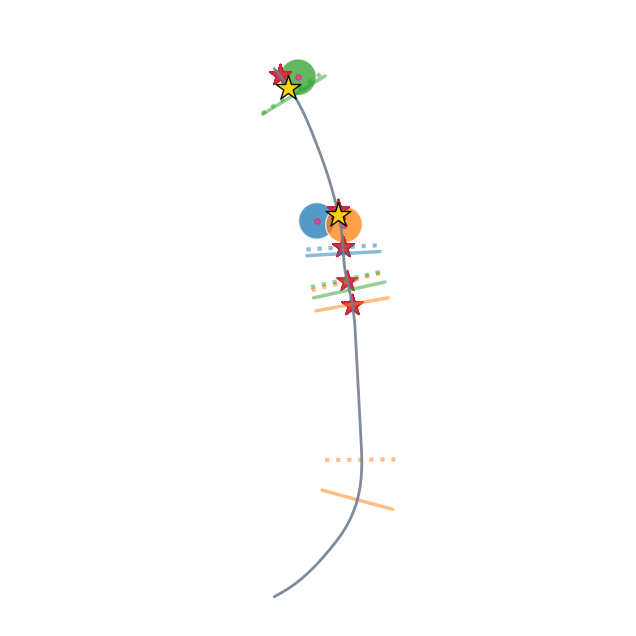

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1856.504211, 1862.693883]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([908, 723, 724])
intended_target_ff_index = None #749
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

pretty_null_arc_plot_kwargs_temp.update({'show_start': False})

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3

updated_args = {'title': ''}



show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=230, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        **updated_args)


## GUAT (switch)

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1537.023148, 1542.046287]
max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([598, 599, 627])
intended_target_ff_index = 717
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

pretty_null_arc_plot_kwargs_temp.update({'show_start': False})

time_to_begin_plotting_null_arc = duration_to_plot[0] + 3
time_between_every_two_null_arcs = 0.3

updated_args = {'title': ''}

show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        **updated_args)



duration after eliminating unnecessary parts:  [1537.023148, 1542.046287]
currentTrial: 599 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  599
duration: [1537.023148, 1542.046287]


# GUAT: plot_trajectories

In [ ]:
current_i = 60

duration [np.float64(1927.34697), np.float64(1934.902033)]
currentTrial: 723 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  723
duration: [np.float64(1927.34697), np.float64(1934.902033)]
1st arch:


<Figure size 700x700 with 0 Axes>

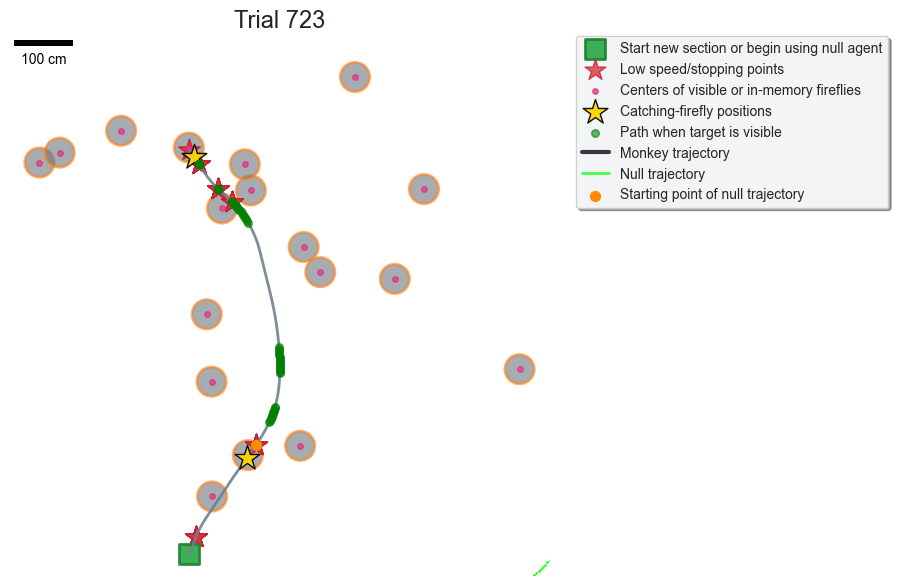

duration [np.float64(1983.023259), np.float64(1993.316489)]
currentTrial: 740 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  740
duration: [np.float64(1983.023259), np.float64(1993.316489)]
1st arch:


<Figure size 700x700 with 0 Axes>

In [ ]:
reload(specific_utils)
reload(plot_trials)
cgt.null_arc_info_for_plotting_temp = cgt.null_arc_info_for_plotting.copy()
cgt.null_arc_info_for_plotting_temp['show_connect_path_ff'] = True
category_item.plot_trajectories(trials=category_item.sort_2_trials[current_i:current_i+2], null_arc_info_for_plotting=cgt.null_arc_info_for_plotting_temp)
current_i = current_i+2

## 489 (Bruno 0330)

In [ ]:

reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1254, 1262]
max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([1042, 1241, 489, 685, 744])
intended_target_ff_index = 1241
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = False

pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = duration_to_plot[0] + 3
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )

currentTrial: 489 num_trials: 3
Since target_index is not provided, it is set to currentTrial:  489
duration: [1254, 1262]


## 567 ??

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
# duration_to_plot = [1469.670162, 1475.0996949999999]
duration_to_plot = [1471, 1475.0996949999999]
max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([780, 703, 655, 567])
intended_target_ff_index = None #1241
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True

pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = duration_to_plot[0] + 3
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )

currentTrial: 567 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  567
duration: [1471, 1475.0996949999999]


## 575 ?

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1483.929318, 1489.226027]
max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([575, 576, 624, 1620, 1170, 1351])
intended_target_ff_index = None #1241
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = False

pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = duration_to_plot[0] + 3
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, show_ff_indices=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )

currentTrial: 575 num_trials: 3
Since target_index is not provided, it is set to currentTrial:  575
duration: [1483.929318, 1489.226027]


## 586

duration after eliminating unnecessary parts:  [1504.795097, 1512.714639]
currentTrial: 586 num_trials: 3
The monkey crossed the arena edge at 1510.928519 but the duration is long enough (more than 2/3 of the original duration) to include the crossing
Since target_index is not provided, it is set to currentTrial:  586
duration: [1504.795097, 1512.714639]


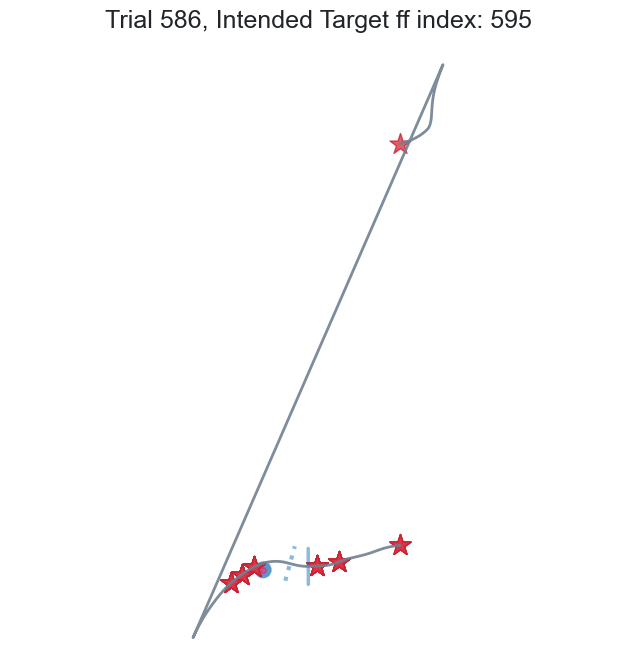

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1504.795097, 1512.714639]
max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([595])
intended_target_ff_index = 595
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = False

pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = duration_to_plot[0] + 3
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )

## 599 ??

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1537.023148, 1542.046287]
max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([598, 599, 627])
intended_target_ff_index = 717
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = duration_to_plot[0] + 3
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )



duration after eliminating unnecessary parts:  [1537.023148, 1542.046287]
currentTrial: 599 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  599
duration: [1537.023148, 1542.046287]


## 622

duration after eliminating unnecessary parts:  [1594.507002, np.float64(1597.545438)]
currentTrial: 621 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  621
duration: [1594.507002, np.float64(1597.545438)]


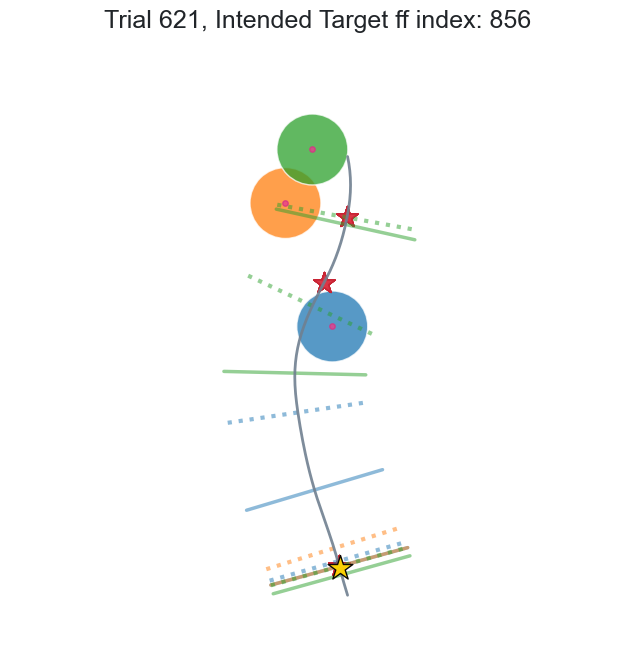

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1594.507002, 1597.611809]
max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([1351, 831, 856])
intended_target_ff_index = 856
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True

pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = duration_to_plot[0] + 1
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )

## 636

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
# duration_to_plot = [1625.433097, 1629.310465]
duration_to_plot = [1621.433097, 1629.310465]
max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([1464, 878, 636, 974])
intended_target_ff_index = 636
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True

pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )

duration after eliminating unnecessary parts:  [np.float64(1625.367102), 1629.310465]
currentTrial: 636 num_trials: 1
duration[0] updated to 1625.367102 to truncate the part of crossing arena edge
Since target_index is not provided, it is set to currentTrial:  636
duration: [np.float64(1625.367102), 1629.310465]


## 641

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1643, 1655]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([726, 665])
intended_target_ff_index = 726
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = False

pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )

duration after eliminating unnecessary parts:  [1643, 1655]
currentTrial: 642 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  642
duration: [1643, 1655]


## 641 (2) x

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1646, 1652]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([822, 641, 665])
intended_target_ff_index = 822
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True

pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )

duration after eliminating unnecessary parts:  [1646, 1652]
currentTrial: 641 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  641
duration: [1646, 1652]


## 650 ?

currentTrial: 650 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  650
duration: [1666.310034, 1671.855963]


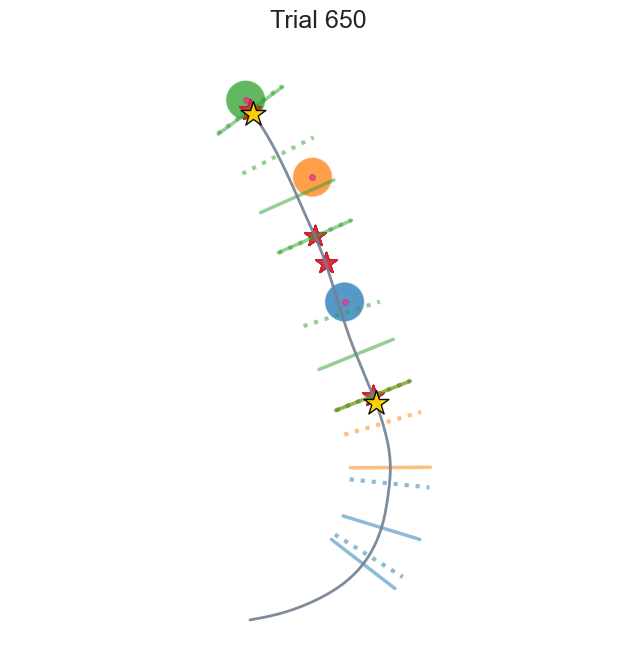

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1666.310034, 1671.855963]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([1089, 694, 650])
intended_target_ff_index = None#822
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True

pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )

## 653

duration after eliminating unnecessary parts:  [1674.543492, 1681.62897]
currentTrial: 652 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  652
duration: [1674.543492, 1681.62897]


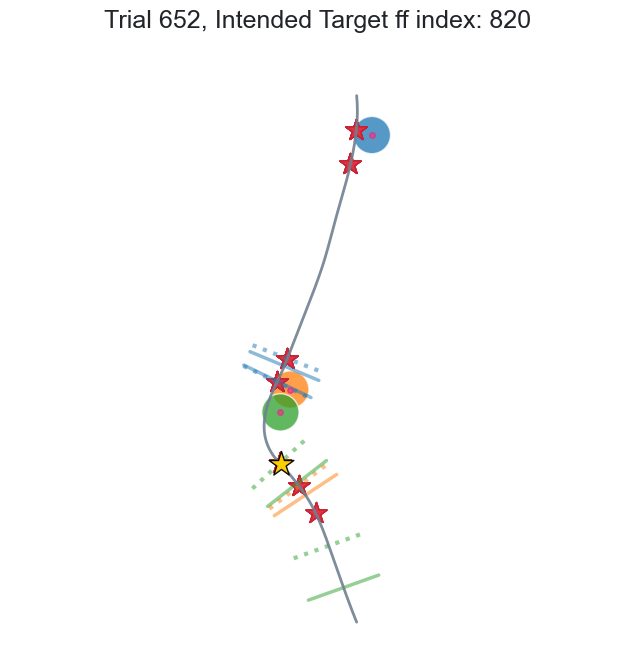

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1674.543492, 1681.62897]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([708, 660, 820])
intended_target_ff_index = 820
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True

pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )

## 653 (2)

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1677.543492, 1683.62897]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([708, 690, 771, 653, 789])
intended_target_ff_index = 708
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True

pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )

duration after eliminating unnecessary parts:  [1677.543492, 1683.62897]
currentTrial: 653 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  653
duration: [1677.543492, 1683.62897]


## 658 (too hard to see)

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1684.973395, 1692.555617]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([668, 656, 657, 704, 797, 798, 824, 658])
intended_target_ff_index = None # 658
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )


currentTrial: 658 num_trials: 3
Since target_index is not provided, it is set to currentTrial:  658
duration: [1684.973395, 1692.555617]


## 660 

duration after eliminating unnecessary parts:  [1692.487749, 1697.950517]
currentTrial: 660 num_trials: 3
Since target_index is not provided, it is set to currentTrial:  660
duration: [1692.487749, 1697.950517]


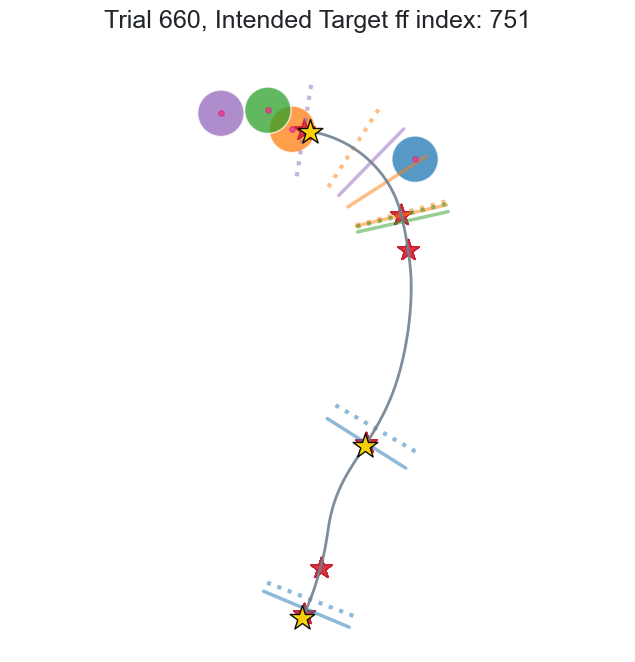

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1692.487749, 1697.950517]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([751, 660, 820, 661])
intended_target_ff_index = 751
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=400, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )


## 679

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1752.16371, 1761.527301]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = None #np.array()
intended_target_ff_index = 728
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=450, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )


duration after eliminating unnecessary parts:  [np.float64(1754.927342), 1761.527301]
currentTrial: 679 num_trials: 1
duration[0] updated to 1754.927342 to truncate the part of crossing arena edge
Since target_index is not provided, it is set to currentTrial:  679
duration: [np.float64(1754.927342), 1761.527301]


## 693

In [ ]:
 [sns.color_palette("tab10", 3), sns.color_palette("tab10", 14)[4:]]

[[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
  (1.0, 0.4980392156862745, 0.054901960784313725),
  (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)],
 [(0.5803921568627451, 0.403921568627451, 0.7411764705882353),
  (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
  (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
  (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
  (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
  (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
  (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
  (1.0, 0.4980392156862745, 0.054901960784313725),
  (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
  (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)]]

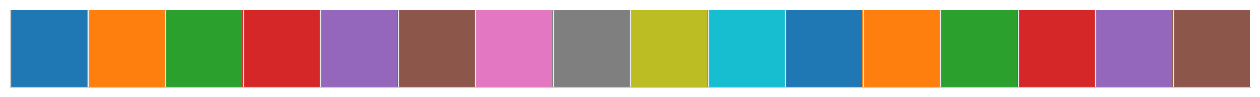

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define palettes

palette2 = sns.color_palette("tab10", 16)

# Concatenate
combined_palette =  palette2

# Visualize as swatches
sns.palplot(combined_palette)
plt.show()


In [ ]:
# Define blue and pink (as RGB tuples in [0,1])
custom_colors = [(0, 0, 1), (1, 0.75, 0.8)]  # blue, pink
# Define your existing palettes
palette1 = sns.color_palette("tab10", 3)
palette2 = sns.color_palette("tab10", 14)[4:]
# Combine
varying_colors = np.concatenate(
    [custom_colors, palette1, palette2], axis=0
)
print(varying_colors.shape)  # should be (15, 3) since 2 + 3 + 10
    

(15, 3)


duration after eliminating unnecessary parts:  [1793.5, 1798.079852]
currentTrial: 693 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  693
duration: [1793.5, 1798.079852]


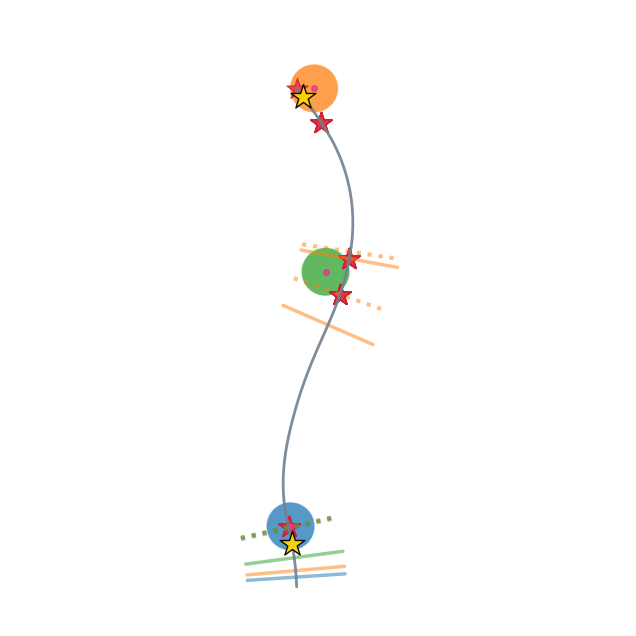

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
# duration_to_plot = [1791.986039, 1798.079852]
duration_to_plot = [1793.5, 1798.079852]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([692, 693, 724])
intended_target_ff_index = 724
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'


time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=450, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        title=''
                                        )


## 713

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1831, 1836.149079]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = None #np.array([692, 693, 724])
intended_target_ff_index = 1492
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=330, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )


duration after eliminating unnecessary parts:  [1831, np.float64(1836.082668)]
currentTrial: 713 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  713
duration: [1831, np.float64(1836.082668)]


## 718

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1838, 1843.994575]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([717, 1401, 718, 845, 905])
intended_target_ff_index = 1401
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=230, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )


duration after eliminating unnecessary parts:  [1838, 1843.994575]
currentTrial: 718 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  718
duration: [1838, 1843.994575]


## 723

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1849.504211, 1854.4]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([722, 749])
intended_target_ff_index = 749
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=230, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )


duration after eliminating unnecessary parts:  [1849.504211, 1854.4]
currentTrial: 722 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  722
duration: [1849.504211, 1854.4]


## 730

duration after eliminating unnecessary parts:  [1873.116986, 1878.281488]
currentTrial: 730 num_trials: 1
Since target_index is not provided, it is set to currentTrial:  730
duration: [1873.116986, 1878.281488]


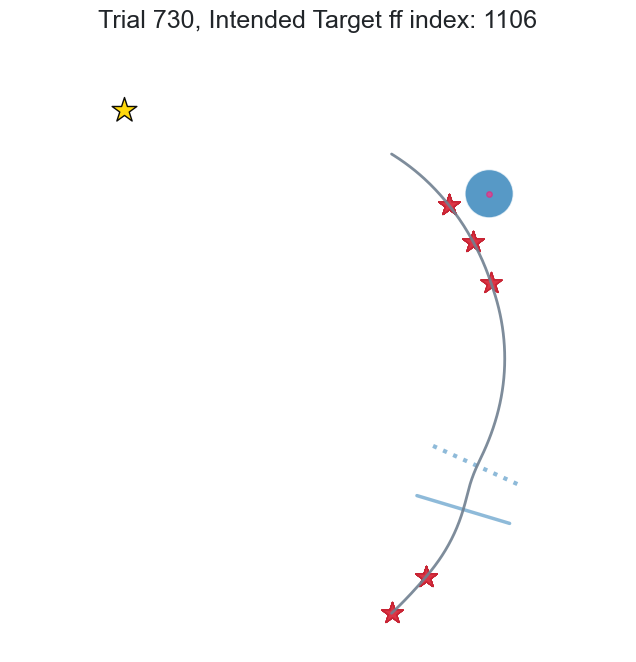

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1873.116986, 1878.281488]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([1106])
intended_target_ff_index = 1106
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=230, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )


## 751

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1919.422092, 1926.644391]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([876, 751])
intended_target_ff_index = 876
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=230, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )


currentTrial: 751 num_trials: 2
duration[0] updated to 1922.484541 to truncate the part of crossing arena edge
Since target_index is not provided, it is set to currentTrial:  751
duration: [np.float64(1922.484541), 1926.644391]


## 756

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1934.510997, 1943.393497]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = np.array([756, 1089, 1703])
intended_target_ff_index = 1089
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3

updated_args = {'title': ''}

show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=230, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        **updated_args)


duration after eliminating unnecessary parts:  [np.float64(1938.071715), 1943.393497]
currentTrial: 756 num_trials: 1
duration[0] updated to 1938.071715 to truncate the part of crossing arena edge
Since target_index is not provided, it is set to currentTrial:  756
duration: [np.float64(1938.071715), 1943.393497]


## 765

In [ ]:
reload(plot_behaviors_utils)
reload(plot_trials)
reload(show_null_trajectory)
# update the figure size of rcParams
plt.rcParams['figure.figsize'] = [9, 9]
duration_to_plot = [1959.975111, 1968.49221]

max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = None #np.array([756, 1089, 1703])
intended_target_ff_index = None #1089
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = True
#pretty_null_arc_plot_kwargs_temp['show_connect_path_ff_specific_indices'] = np.array([668, 656, 657, 704, 797, 798, 824, 658])
pretty_null_arc_plot_kwargs_temp['vary_color_for_connecting_path_ff'] = False
pretty_null_arc_plot_kwargs_temp['show_reward_boundary'] = False
pretty_null_arc_plot_kwargs_temp['how_to_show_ff_for_visible_segments'] = 'circle'

time_to_begin_plotting_null_arc = None
time_between_every_two_null_arcs = 0.3


show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=230, ff_max_distance_to_path=400, time_between_every_two_null_arcs=time_between_every_two_null_arcs, time_to_begin_plotting_null_arc=time_to_begin_plotting_null_arc, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )


currentTrial: 765 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  765
duration: [1959.975111, 1968.49221]


In [ ]:
category_item.plot_trajectories(trials=[765], null_arc_info_for_plotting=cgt.null_arc_info_for_plotting,
                                show_connect_path_ff=True, show_ff_indices=True)

duration [np.float64(1959.97511), np.float64(1968.492209)]
currentTrial: 765 num_trials: 2
Since target_index is not provided, it is set to currentTrial:  765
duration: [np.float64(1959.97511), np.float64(1968.492209)]
(14, 3)
shown_ff_indices:  [ 764  765  768  792  809  810  845  862  869  891  931  945  961 1037
 1111 1244 1344 1491 1492 1703]
1st arch:


<Figure size 700x700 with 0 Axes>

In [ ]:
reload(show_null_trajectory)
duration_to_plot = [1254.09006, 1260.797728]
max_num_plot_to_make = 1
ff_indices_to_plot_null_arc = None #np.array([62, 413, 60, 61])
intended_target_ff_index = 1241
point_indices_to_plot_null_arc = None #[10147]
pretty_null_arc_plot_kwargs_temp = pretty_null_arc_plot_kwargs.copy()
pretty_null_arc_plot_kwargs_temp['show_believed_target_positions'] = False

show_null_trajectory.make_pretty_plot_for_a_duration(duration_to_plot, cgt.best_arc_df, cgt.monkey_information, cgt.ff_dataframe, cgt.null_arc_info_for_plotting, cgt.null_arc_to_center_info_for_plotting, cgt.PlotTrials_args, pretty_null_arc_plot_kwargs_temp, intended_target_ff_index=intended_target_ff_index,
                                        plot_null_arcs= False, ff_max_distance_to_intended_target=250, ff_max_distance_to_path=400, time_between_every_two_null_arcs=0.2, time_to_begin_plotting_null_arc=None, time_to_end_plotting_null_arc=None, max_num_plot_to_make=max_num_plot_to_make,
                                        show_intended_target=False, point_indices_to_plot_null_arc=point_indices_to_plot_null_arc, ff_indices_to_plot_null_arc=ff_indices_to_plot_null_arc, whether_mark_path_where_intended_target_has_best_arc_among_all_ff=False, 
                                        )

currentTrial: 489 num_trials: 3
Since target_index is not provided, it is set to currentTrial:  489
duration: [1254.09006, 1260.797728]


In [ ]:
STOP!

SyntaxError: invalid syntax (2635050600.py, line 1)

# Appendix

## Plot trials

In [ ]:
classic_plot_kwargs = {'show_stops': True,
                       'show_believed_target_positions': True,
                       'show_reward_boundary': True,
                       'show_scale_bar': True}
cgt.PlotTrials_args = (cgt.monkey_information, cgt.ff_dataframe, cgt.ff_life_sorted, cgt.ff_real_position_sorted, cgt.ff_believed_position_sorted, cgt.cluster_around_target_indices, cgt.ff_caught_T_new)

In [ ]:
from data_wrangling import general_utils

In [ ]:

num_trials = 2 


with general_utils.initiate_plot(10,10,100):
  for currentTrial in [96+1, 102+1]: #two_in_a_row[10:20]:
      duration = [cgt.ff_caught_T_new[currentTrial-num_trials], cgt.ff_caught_T_new[currentTrial]]
      plot_trials.PlotTrials(duration, 
                  *cgt.PlotTrials_args,
                  **classic_plot_kwargs,
                  currentTrial = currentTrial,
                  num_trials = num_trials,                   
                  show_connect_path_ff_except_targets = True,
                  show_path_when_target_visible = True,
                  show_ff_indices = False,
                  hitting_arena_edge_ok = True,
                  visible_distance = 400,
                  minimal_margin = 300,
                  show_monkey_angles = True
                  )
      plt.show()  

      